# 부천과 서울 아파트 매매 가격 동향 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [2]:
df_price = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\한국부동산원_아파트 평균매매가격(월별)_20201029.csv', encoding = 'cp949')
df_first = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding = 'cp949')
df_last = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20200430.csv', encoding = 'cp949')


In [3]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
df_first = df_first.melt(id_vars = '지역', var_name = '기간', value_name = '평당분양가격')

In [5]:
def parse_year(date):
    year = date.split('년')[0]
    year = int(year)
    return year

def parse_month(date):
    month = date.split('년')[1].replace('월','')
    month = int(month)
    return month

In [6]:
df_first['연도']  = df_first['기간'].apply(parse_year)
df_first['월']  = df_first['기간'].apply(parse_month)

In [7]:
df_first_prepare = df_first.drop('기간', axis=1).copy()

In [8]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4675 non-null   object
 1   규모구분     4675 non-null   object
 2   연도       4675 non-null   int64 
 3   월        4675 non-null   int64 
 4   분양가격(㎡)  4346 non-null   object
dtypes: int64(2), object(3)
memory usage: 182.7+ KB


In [9]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors = 'coerce')

In [10]:
df_last['평당분양가격'] = df_last['분양가격']*3.3
df_last['지역'] = df_last['지역명']
df_last['전용면적'] = df_last['규모구분']

In [11]:
cols = ['지역','연도','월','평당분양가격']
df_last_prepare = df_last.loc[
    df_last['전용면적'] == '전체', cols].copy()

In [12]:
df = pd.concat([df_first_prepare, df_last_prepare])

In [13]:
df = df[df.notnull()]
df

,지역,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
4650,전북,8259.9,2020,4
4655,전남,8550.3,2020,4
4660,경북,8807.7,2020,4
4665,경남,10404.9,2020,4


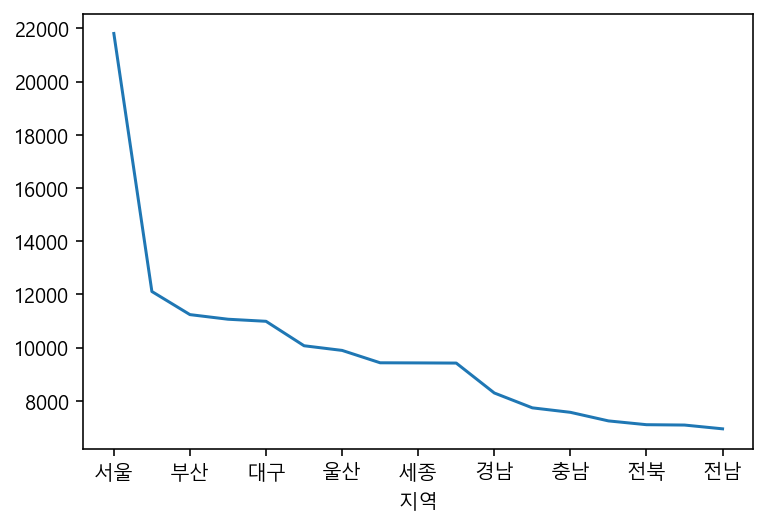

In [14]:
g = df.groupby(['지역'])['평당분양가격'].mean().sort_values(ascending=False)
g.plot()

p = pd.pivot_table(df, index = '연도', columns = '지역', values = '평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

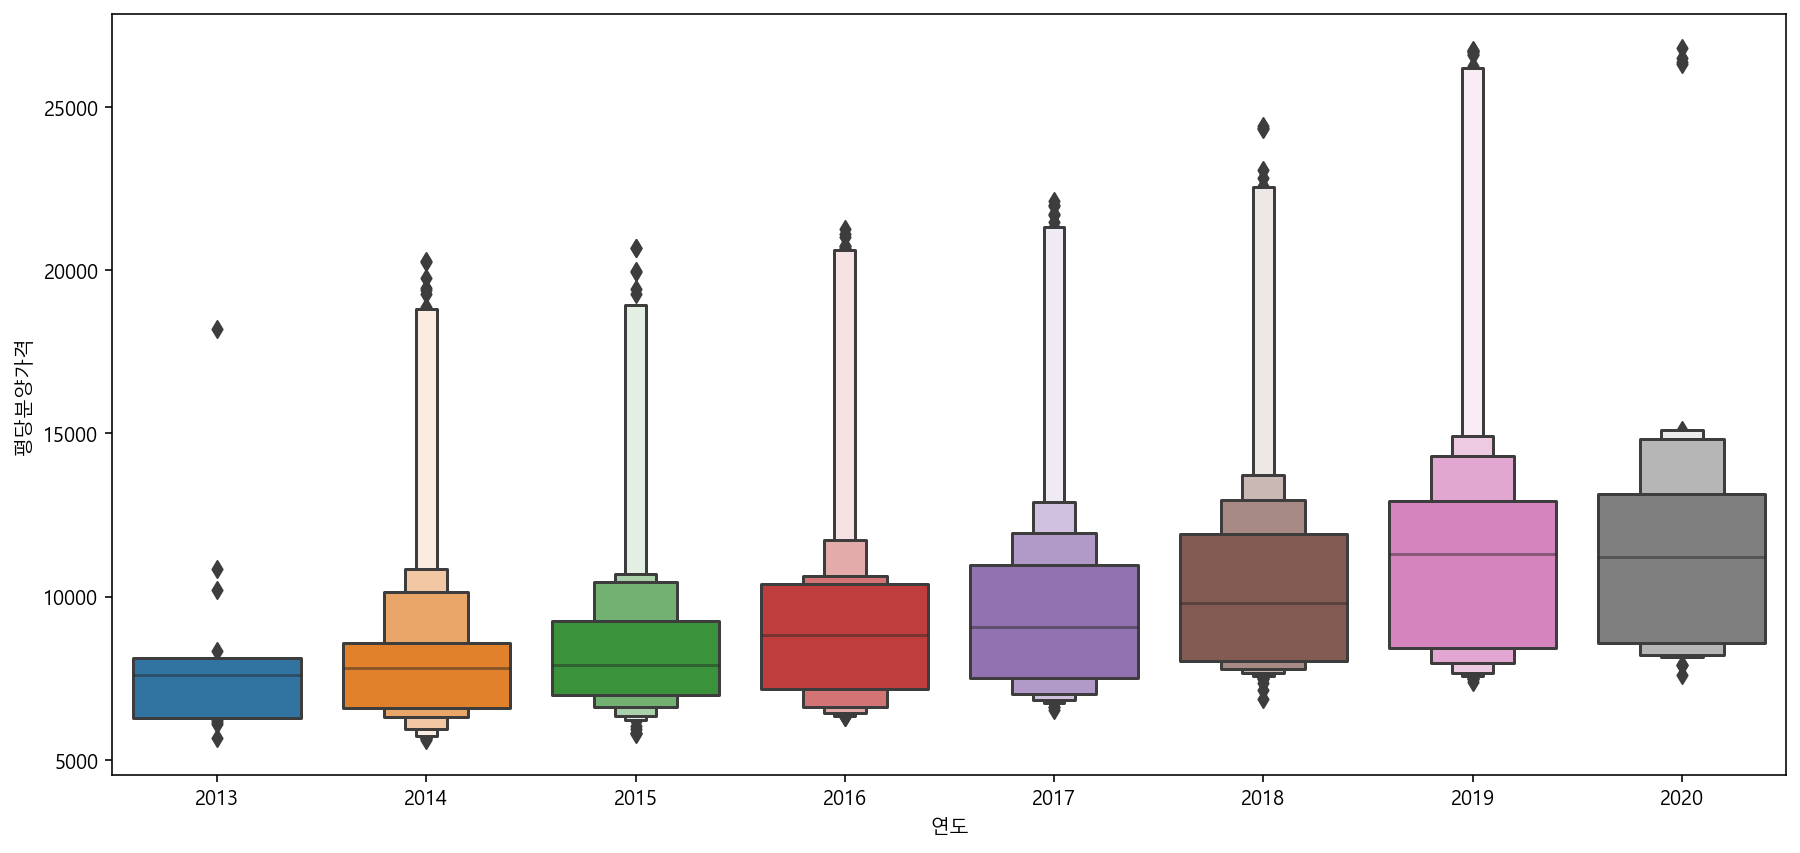

In [15]:
plt.figure(figsize=(15,7))
sns.boxenplot(data = df, x = '연도', y = '평당분양가격')

<AxesSubplot:xlabel='지역', ylabel='평당분양가격'>

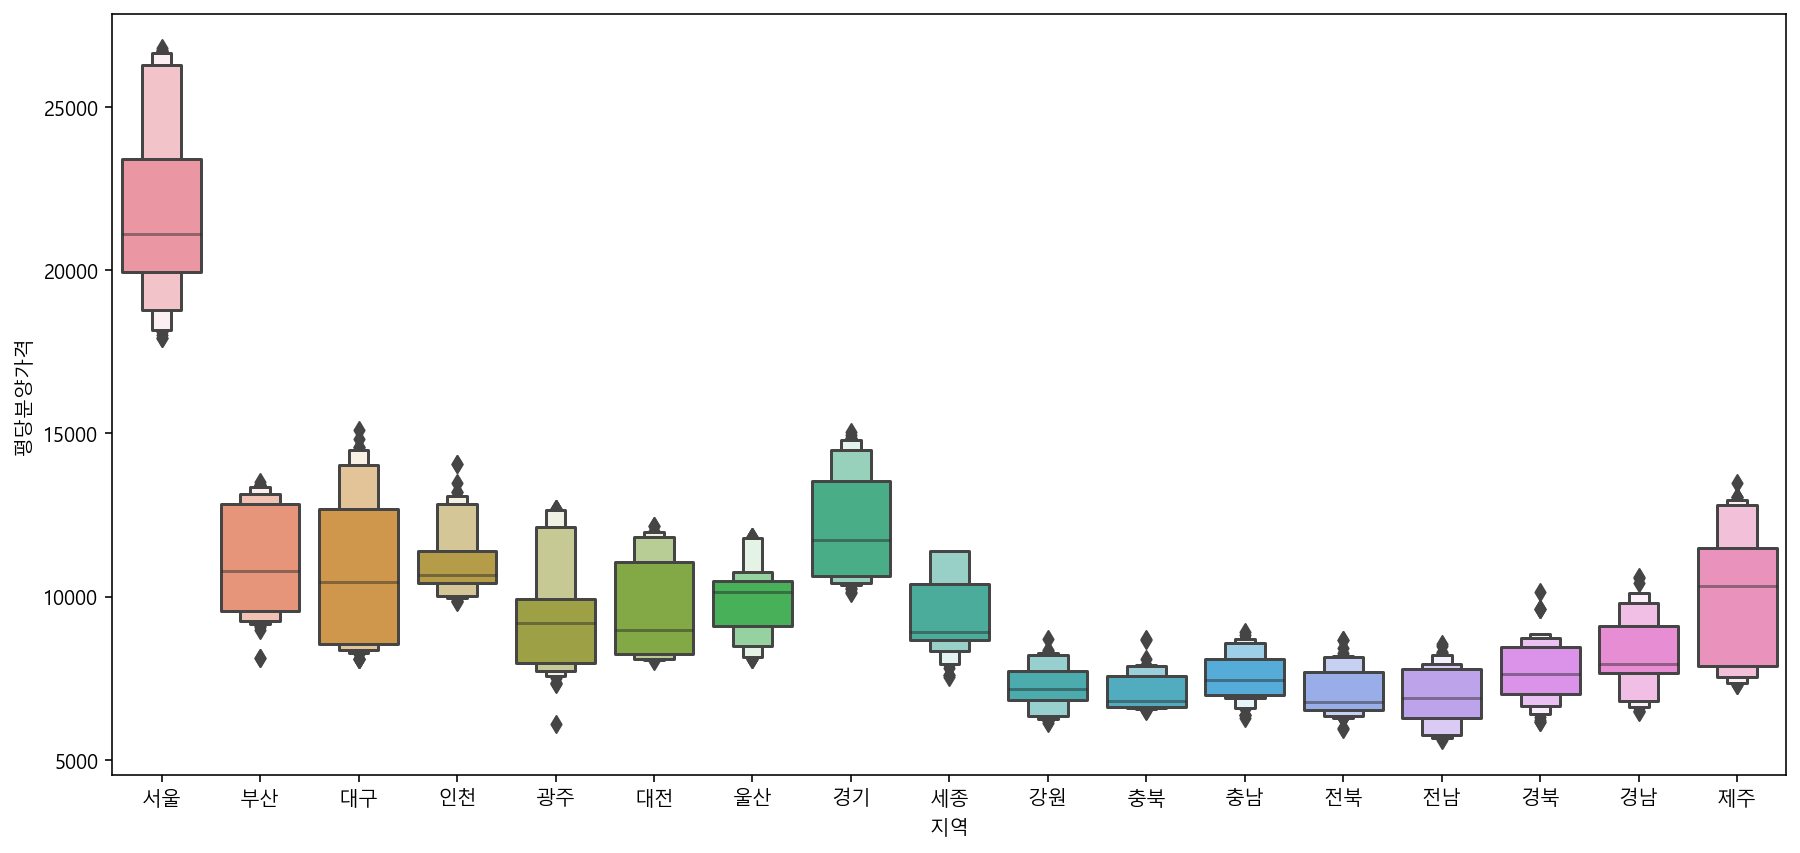

In [16]:
plt.figure(figsize=(15,7))
sns.boxenplot(data = df, x = '지역', y = '평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='지역'>

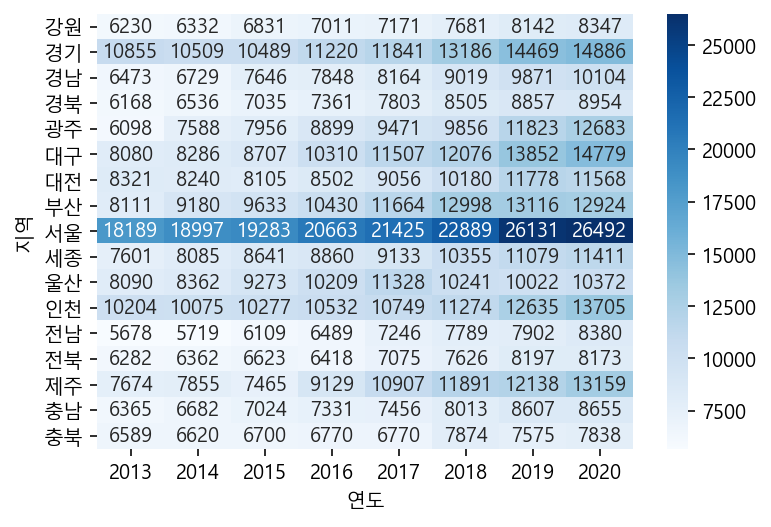

In [17]:
t = df.pivot_table(index = '지역', columns='연도', values='평당분양가격')
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

In [18]:
g = df.groupby(['연도','지역'])['평당분양가격'].mean().unstack().round()
g

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7171.0,11841.0,8164.0,7803.0,9471.0,11507.0,9056.0,11664.0,21425.0,9133.0,11328.0,10749.0,7246.0,7075.0,10907.0,7456.0,6770.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,8347.0,14886.0,10104.0,8954.0,12683.0,14779.0,11568.0,12924.0,26492.0,11411.0,10372.0,13705.0,8380.0,8173.0,13159.0,8655.0,7838.0


<AxesSubplot:xlabel='연도', ylabel='지역'>

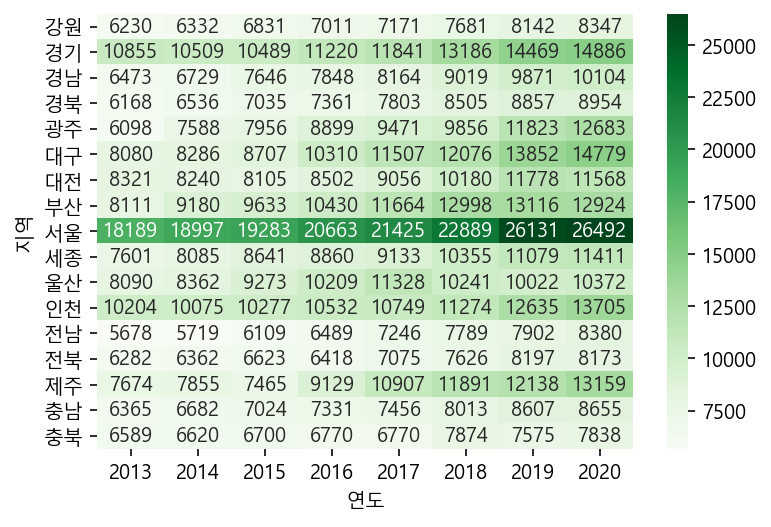

In [19]:
sns.heatmap(g.T, annot=True,fmt='.0f', cmap='Greens')

<AxesSubplot:>

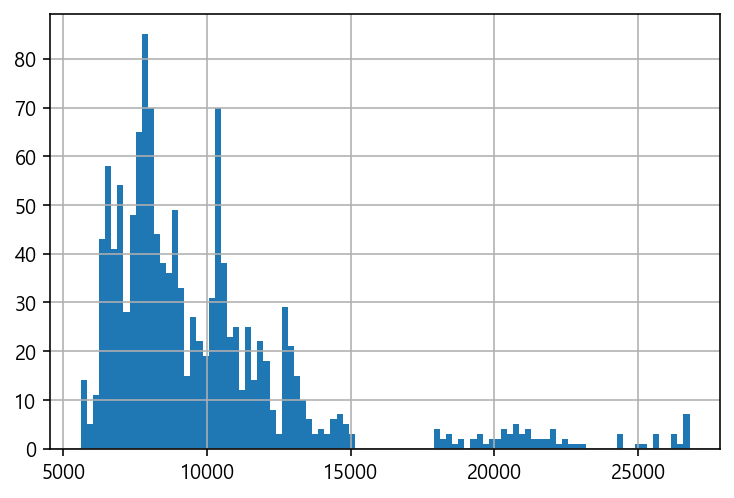

In [20]:
df['평당분양가격'].hist(bins=100)

In [21]:
price = df_last.loc[df_last['평당분양가격'].notnull(), '평당분양가격']

C:\Users\pjk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

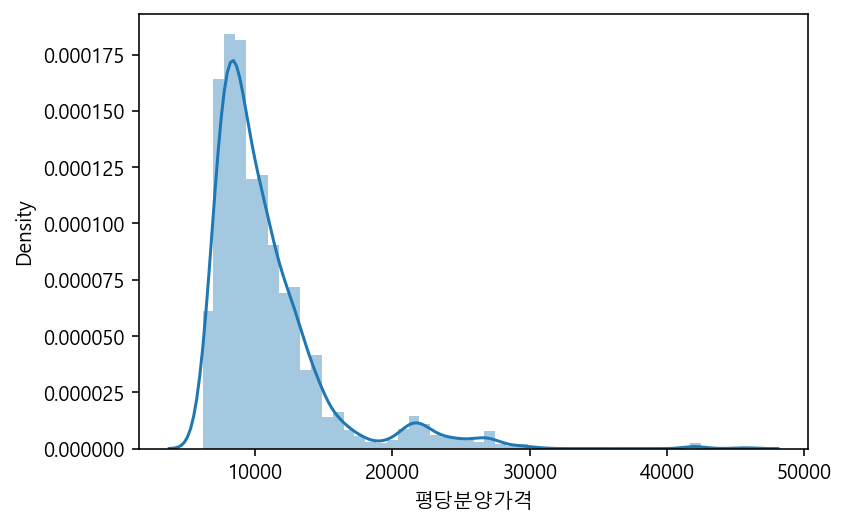

In [22]:
sns.distplot(price)

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

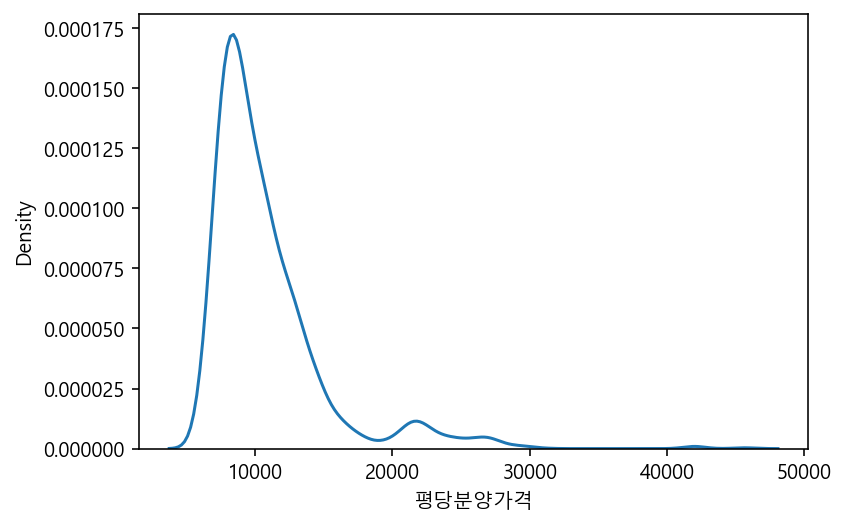

In [23]:
sns.kdeplot(price)

C:\Users\pjk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

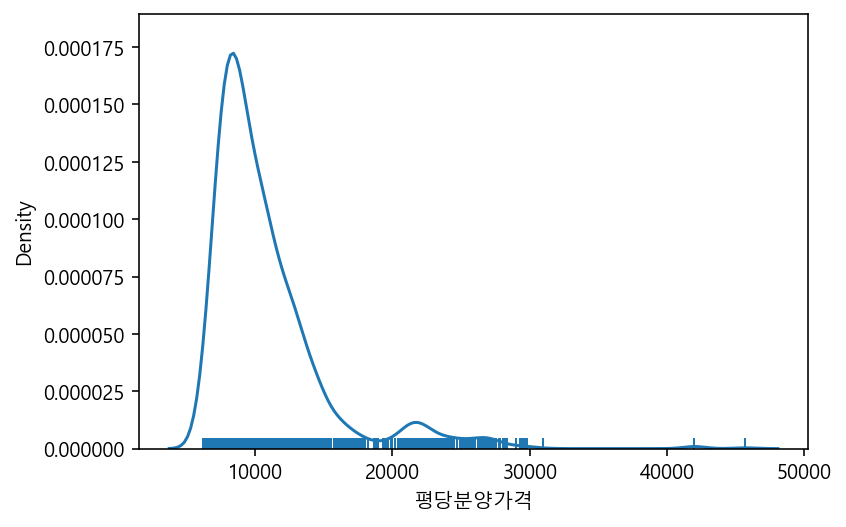

In [24]:
sns.distplot(price, hist=False, rug=True)

Text(0.5, 1.0, '연도별 전국 평균 평당 분양가격')

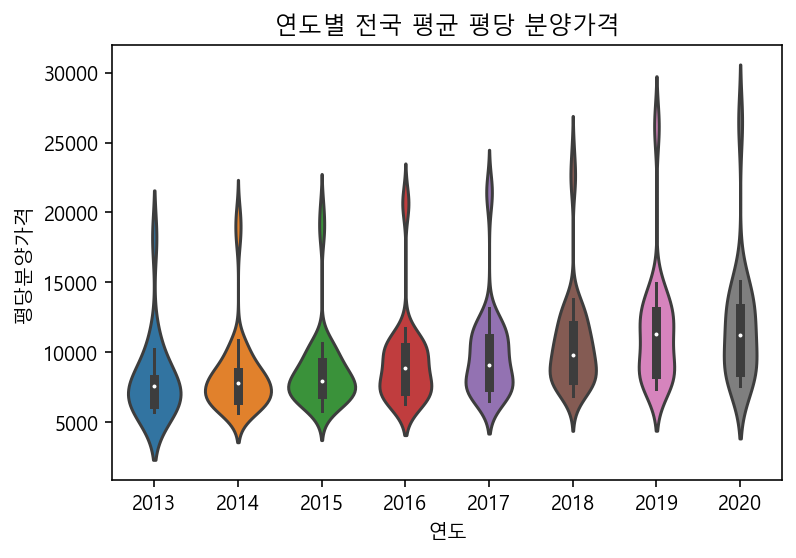

In [25]:
sns.violinplot(data=df, x='연도', y='평당분양가격').set_title('연도별 전국 평균 평당 분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

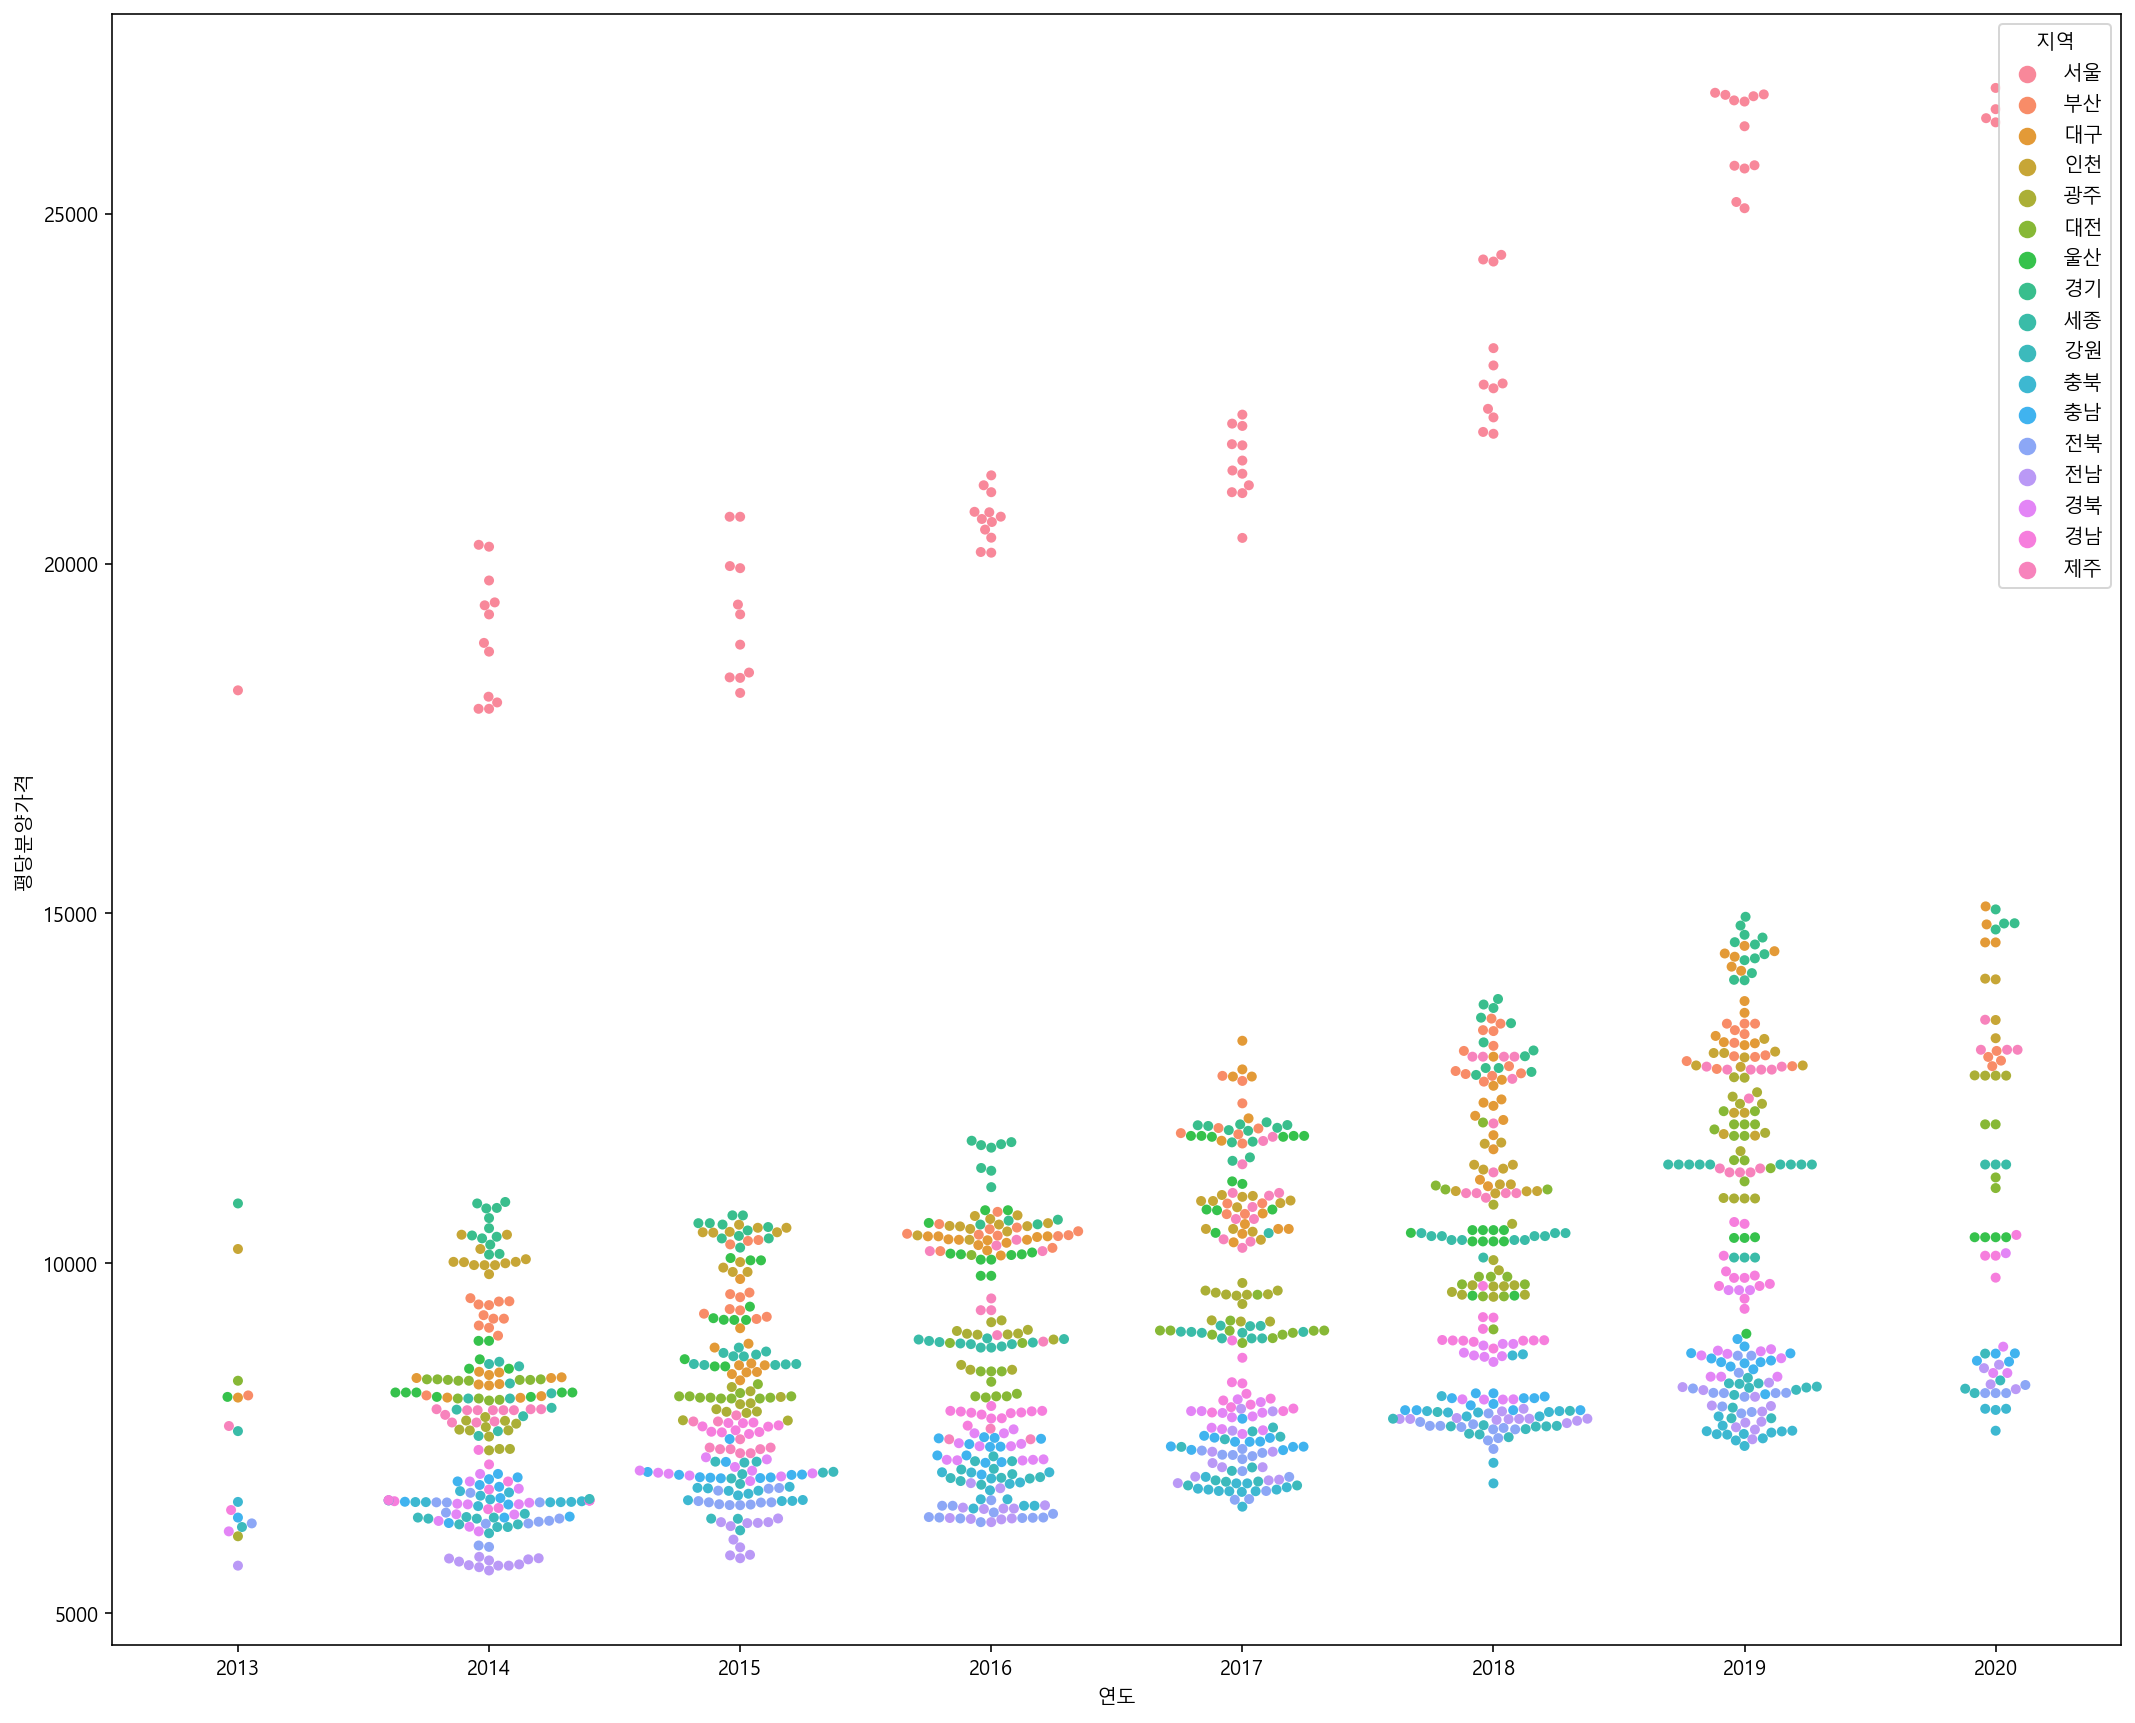

In [69]:
plt.figure(figsize=(18,15))
sns.swarmplot(data=df, x='연도', y='평당분양가격', hue='지역')

In [27]:
df_price = df_price.melt(id_vars = '지 역', var_name = '기간', value_name = '평균매매가격').copy()
df_price

,지 역,기간,평균매매가격
0,전국,2012-01,264474.0
1,수도권,2012-01,365249.0
2,지방권,2012-01,163394.0
3,6대광역시,2012-01,195186.0
4,5대광역시,2012-01,190421.0
...,...,...,...
24775,경남 거제시,2020-09,156366.0
24776,경남 양산시,2020-09,172828.0
24777,제주,2020-09,283991.0
24778,제주 제주시,2020-09,303757.0


In [28]:
def parse_year(date):
    year = date.split('-')[0]
    year = int(year)
    return year

def parse_month(date):
    month = date.split('-')[1]
    month = int(month)
    return month

df_price['지역'] = df_price['지 역']
df_price['연도'] = df_price['기간'].apply(parse_year)
df_price['월'] = df_price['기간'].apply(parse_month)

In [29]:
df_price.columns

Index(['지 역', '기간', '평균매매가격', '지역', '연도', '월'], dtype='object')

In [30]:
cols = ['평균매매가격', '지역', '연도', '월']
df_price = df_price[cols]

In [31]:
df_seoul = df_price[df_price['지역'].str.contains('서울')].copy()

In [32]:
local = '경기 부천시'

def city(local):
    name = local.split(' ')[0]
    name = str(name)
    return name

def city_lower(local):
    if len(local) > 2:
        name_lower = local.split(' ')[1]
        name_lower = str(name_lower)
        return name_lower

f'{city(local)} {city_lower(local)}'

'경기 부천시'

In [33]:
df_seoul['시도'] = df_seoul['지역'].apply(city)
df_seoul['구군'] = df_seoul['지역'].apply(city_lower)

In [34]:
df_seoul = df_seoul[1:]
cols = ['평균매매가격','연도','월','시도','구군']
df_seoul = df_seoul[cols].copy()


In [35]:
df_seoul

,평균매매가격,연도,월,시도,구군
8,405962.0,2012,1,서울,강북지역
9,706316.0,2012,1,서울,도심권
10,501646.0,2012,1,서울,종로구
11,545130.0,2012,1,서울,중구
12,852152.0,2012,1,서울,용산구
...,...,...,...,...,...
24579,1439654.0,2020,9,서울,동남권
24580,1759164.0,2020,9,서울,서초구
24581,1741538.0,2020,9,서울,강남구
24582,1266416.0,2020,9,서울,송파구


In [36]:
df_seoul = df_seoul[df_seoul['구군'].str.contains('군|지역|권') == False].copy()

## 서울시 전처리 완료


In [37]:
df_seoul

,평균매매가격,연도,월,시도,구군
10,501646.0,2012,1,서울,종로구
11,545130.0,2012,1,서울,중구
12,852152.0,2012,1,서울,용산구
14,475333.0,2012,1,서울,성동구
15,666091.0,2012,1,서울,광진구
...,...,...,...,...,...
24578,530511.0,2020,9,서울,관악구
24580,1759164.0,2020,9,서울,서초구
24581,1741538.0,2020,9,서울,강남구
24582,1266416.0,2020,9,서울,송파구


In [38]:
df_b  = df_price[df_price['지역'].str.contains('부천')].copy()

In [39]:
df_b.head()

,평균매매가격,지역,연도,월
64,264784.0,경기 부천시,2012,1
300,263646.0,경기 부천시,2012,2
536,262913.0,경기 부천시,2012,3
772,261679.0,경기 부천시,2012,4
1008,260055.0,경기 부천시,2012,5


In [40]:
def city(local):
    name = local.split(' ')[0]
    name = str(name)
    return name

def city_lower(local):
    name_lower = local.split(' ')[1]
    name_lower = str(name_lower)
    return name_lower
    
df_b['시도'] = df_b['지역'].apply(city_lower)

In [41]:
df_b = df_b.drop('지역', axis=1).copy()

## 부천시 전처리 완료

In [42]:
df_b

,평균매매가격,연도,월,시도
64,264784.0,2012,1,부천시
300,263646.0,2012,2,부천시
536,262913.0,2012,3,부천시
772,261679.0,2012,4,부천시
1008,260055.0,2012,5,부천시
...,...,...,...,...
23664,358671.0,2020,5,부천시
23900,362547.0,2020,6,부천시
24136,366676.0,2020,7,부천시
24372,370076.0,2020,8,부천시


# 서울시 시각화

## 서울시 구 별 시각화

Text(0.5, 1.0, '서울시 구 별 아파트 평균 매매가 (단위:천원)')

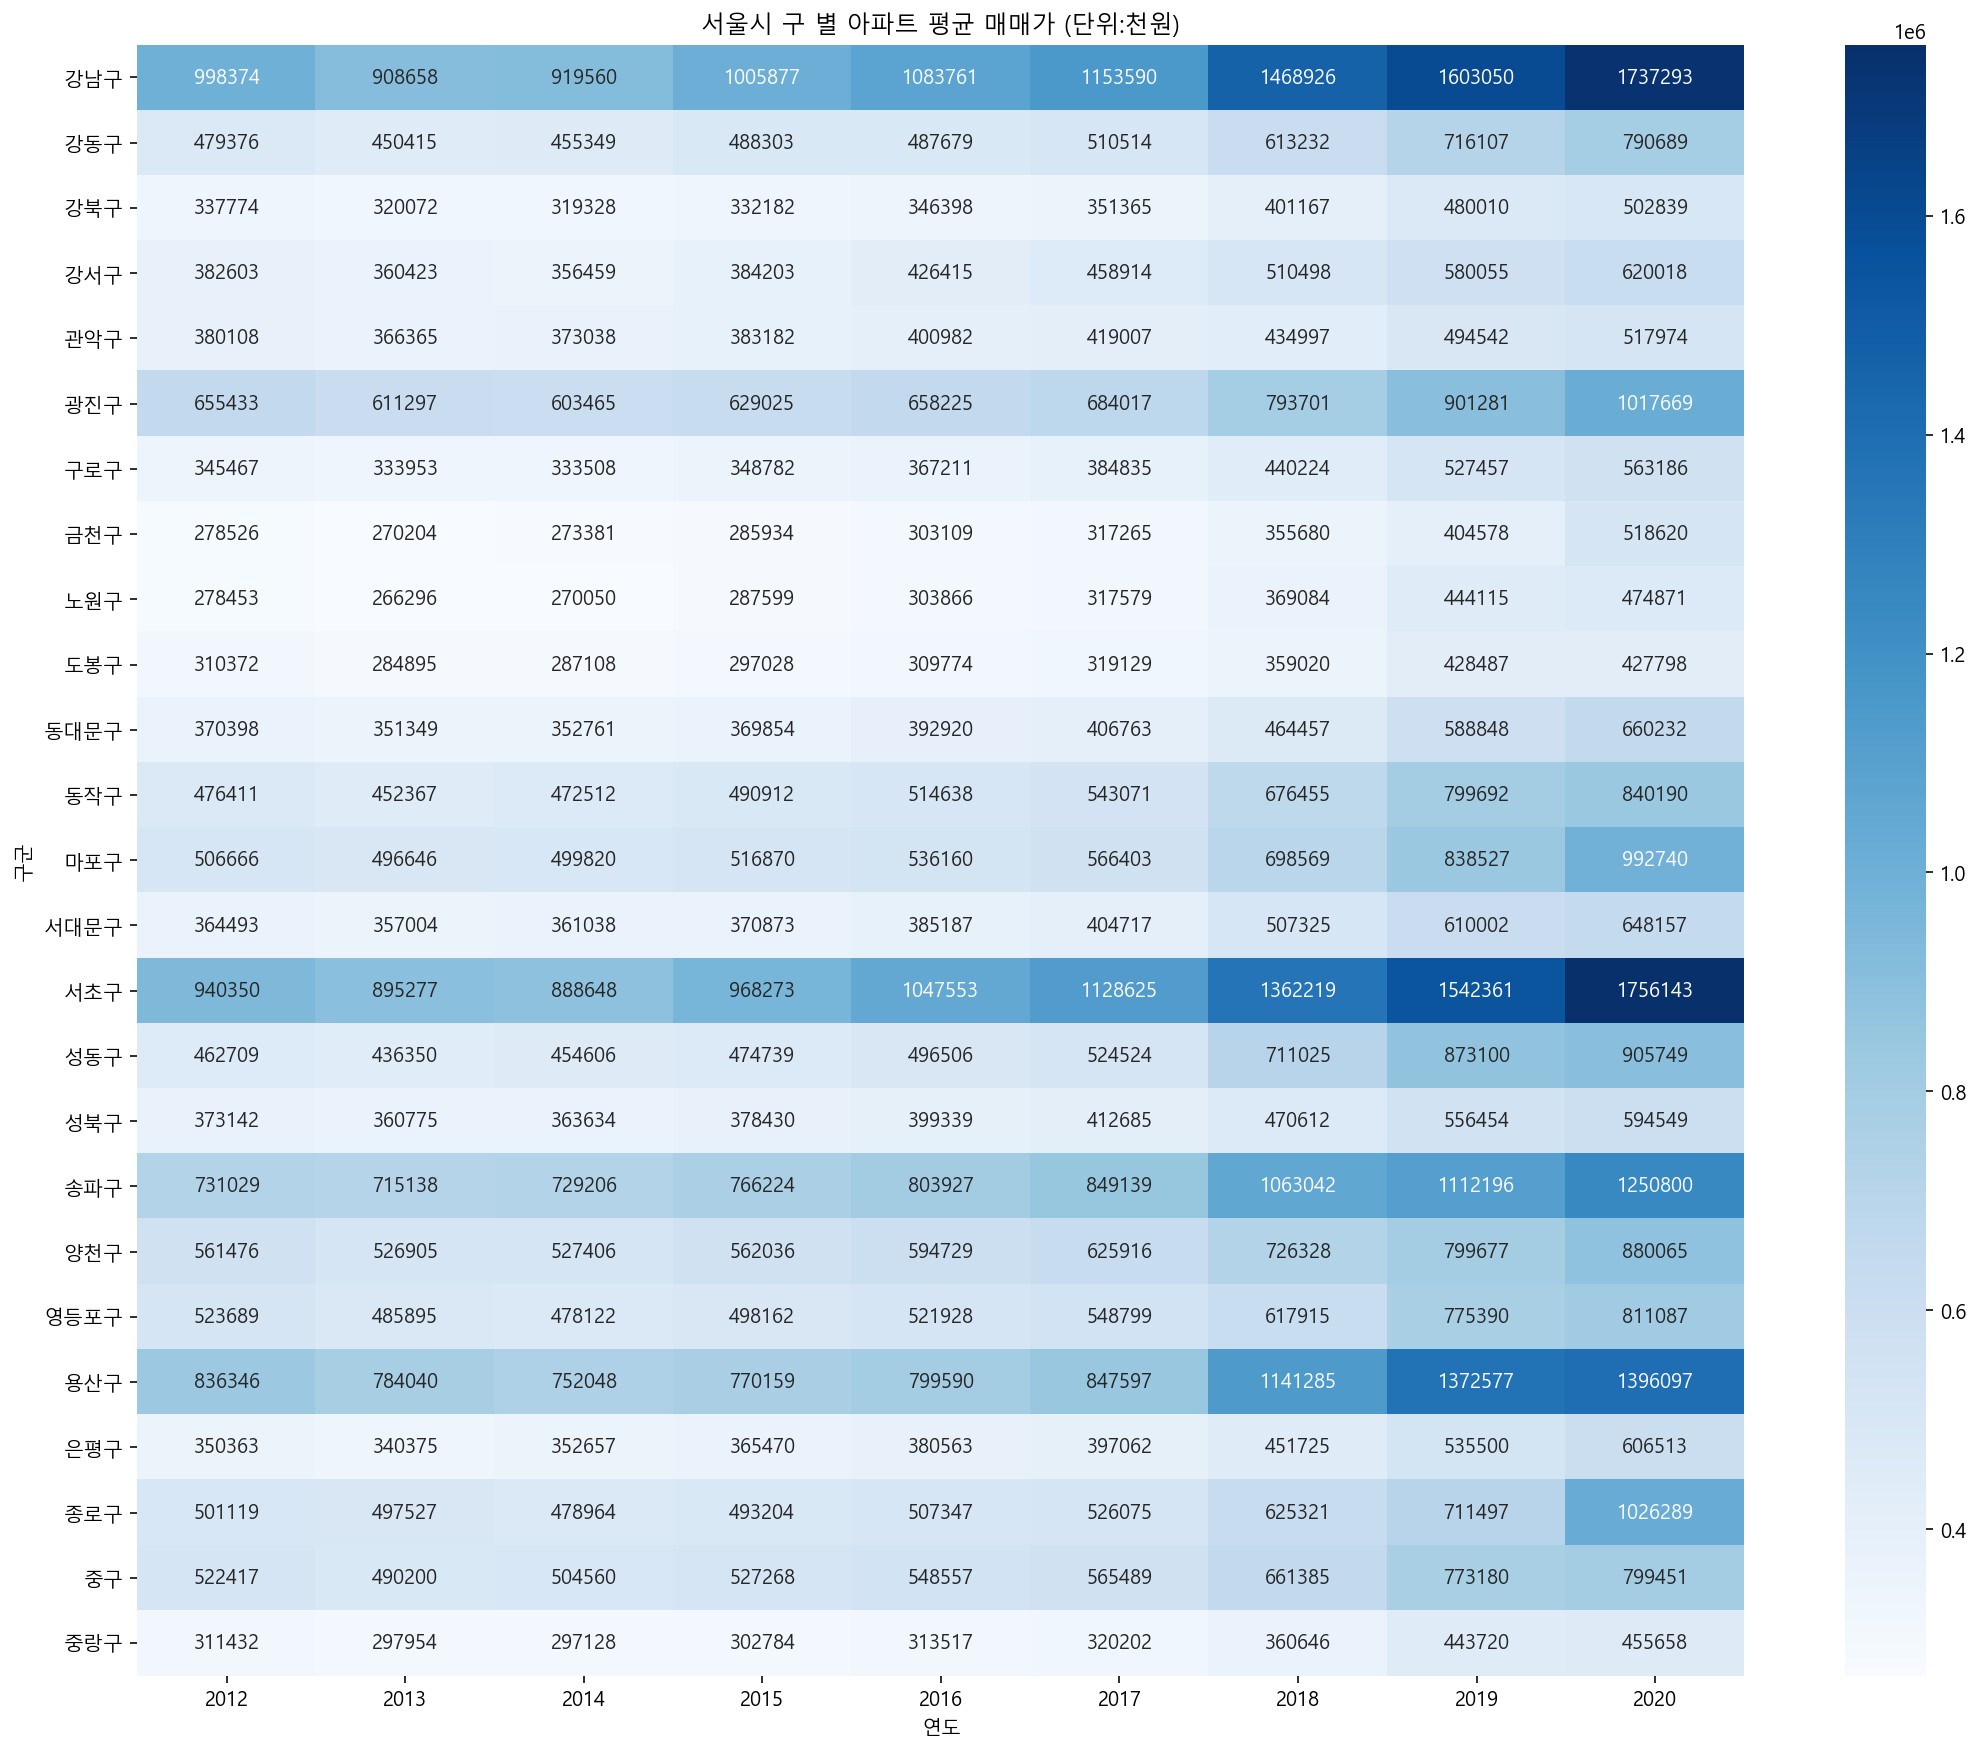

In [43]:
s_g = df_seoul.groupby(['구군','연도'])['평균매매가격'].mean().unstack().round()
s_p = df_seoul.pivot_table(index = '구군', columns ='연도', values ='평균매매가격')
plt.figure(figsize=(18,15))
sns.heatmap(data=s_g,annot=True, fmt = '.0f', cmap = 'Blues').set_title('서울시 구 별 아파트 평균 매매가 (단위:천원)')

Text(0.5, 1.0, '서울시 구 별 아파트 평균 매매가 (단위:천원)')

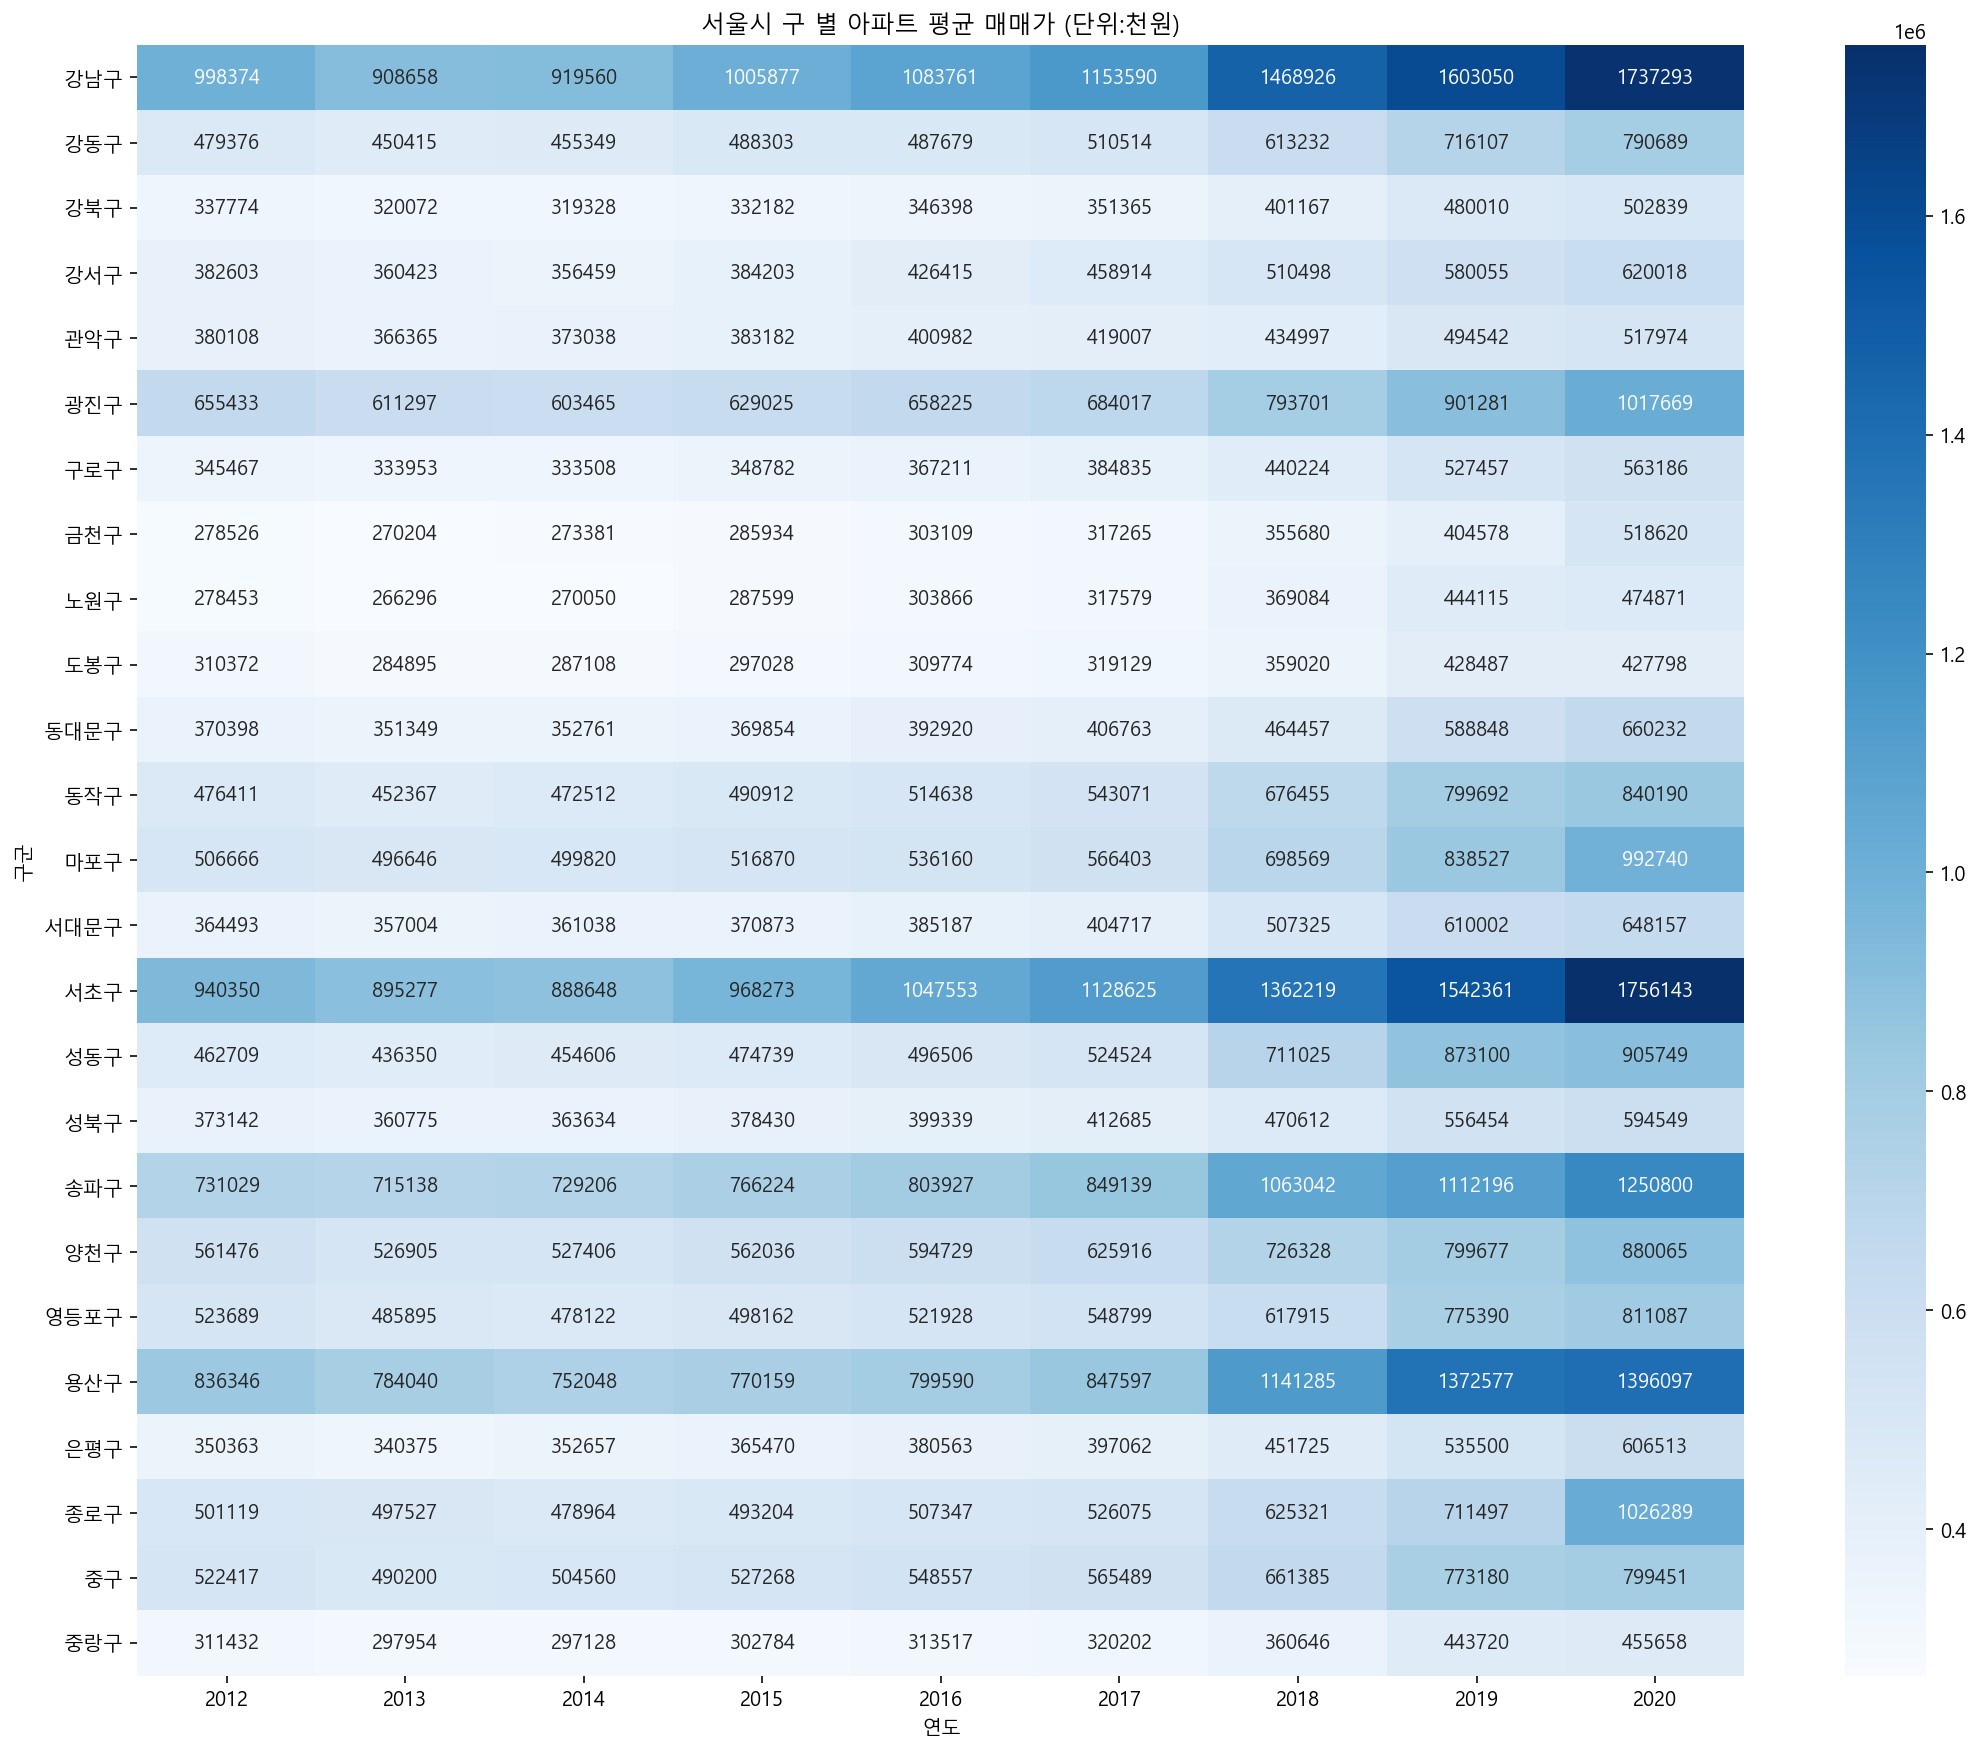

In [44]:
s_p   
plt.figure(figsize=(18,15))
sns.heatmap(data=s_p,annot=True, fmt = '.0f', cmap = 'Blues').set_title('서울시 구 별 아파트 평균 매매가 (단위:천원)')

## 서울시 전체 시각화

Text(0.5, 1.0, '서울시 평균 아파트 매매 가격 (단위:십억원)')

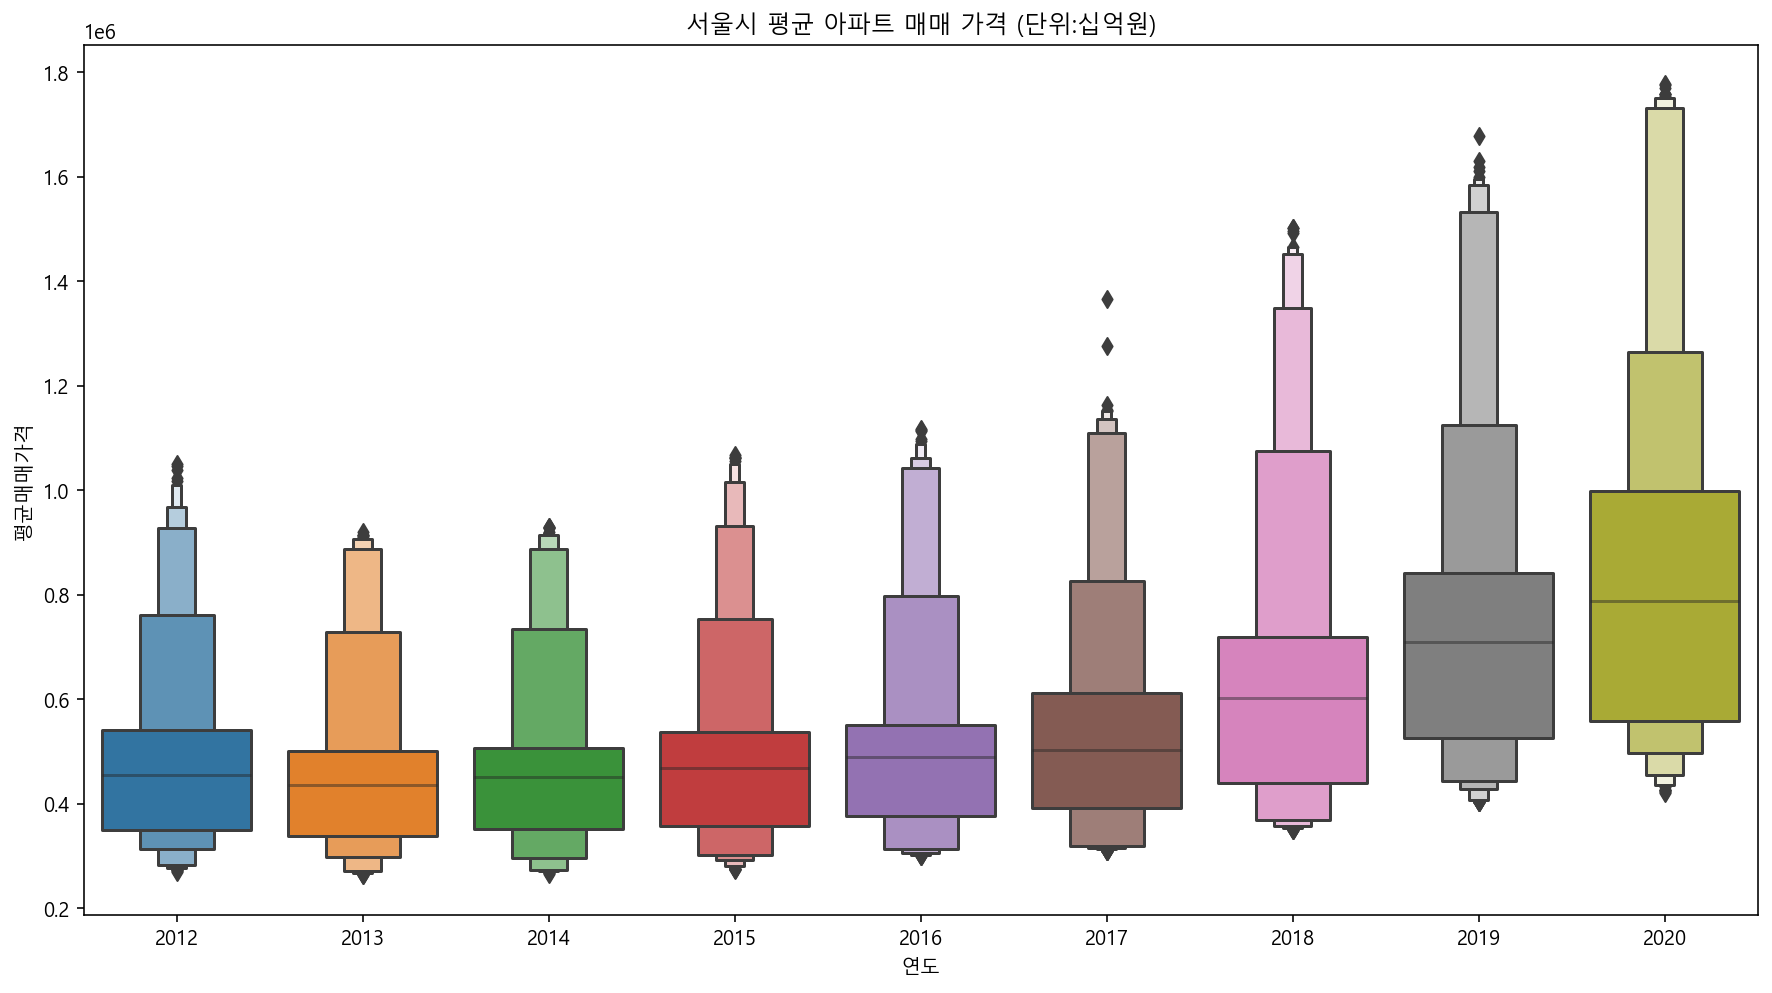

In [45]:
plt.figure(figsize=(15,8))
sns.boxenplot(data = df_seoul, x = '연도', y='평균매매가격').set_title('서울시 평균 아파트 매매 가격 (단위:십억원)')

<AxesSubplot:xlabel='연도', ylabel='평균매매가격'>

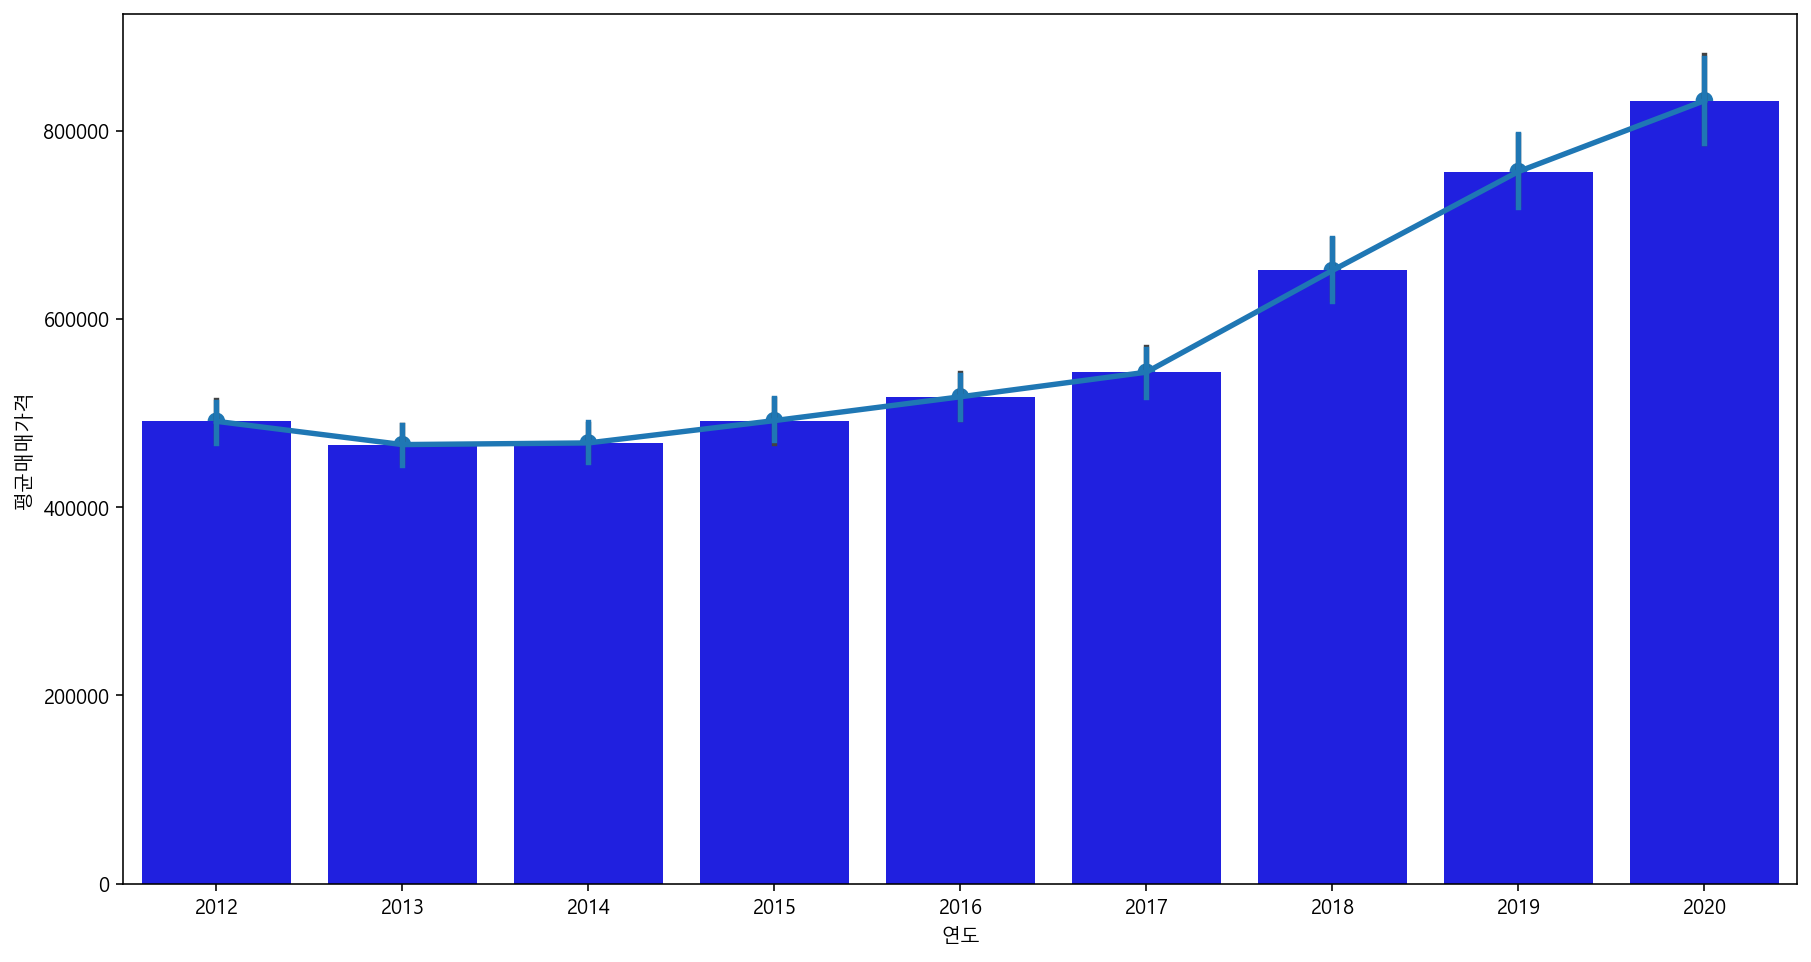

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_seoul, x="연도", y="평균매매가격", color='b')
sns.pointplot(data=df_seoul, x="연도", y="평균매매가격")

# 경기도 시각화

## 부천시 시각화

In [47]:
df_b.head(1)

,평균매매가격,연도,월,시도
64,264784.0,2012,1,부천시


Text(0.5, 1.0, '부천시 아파트 평균 매매 가격 (단위:천원) ')

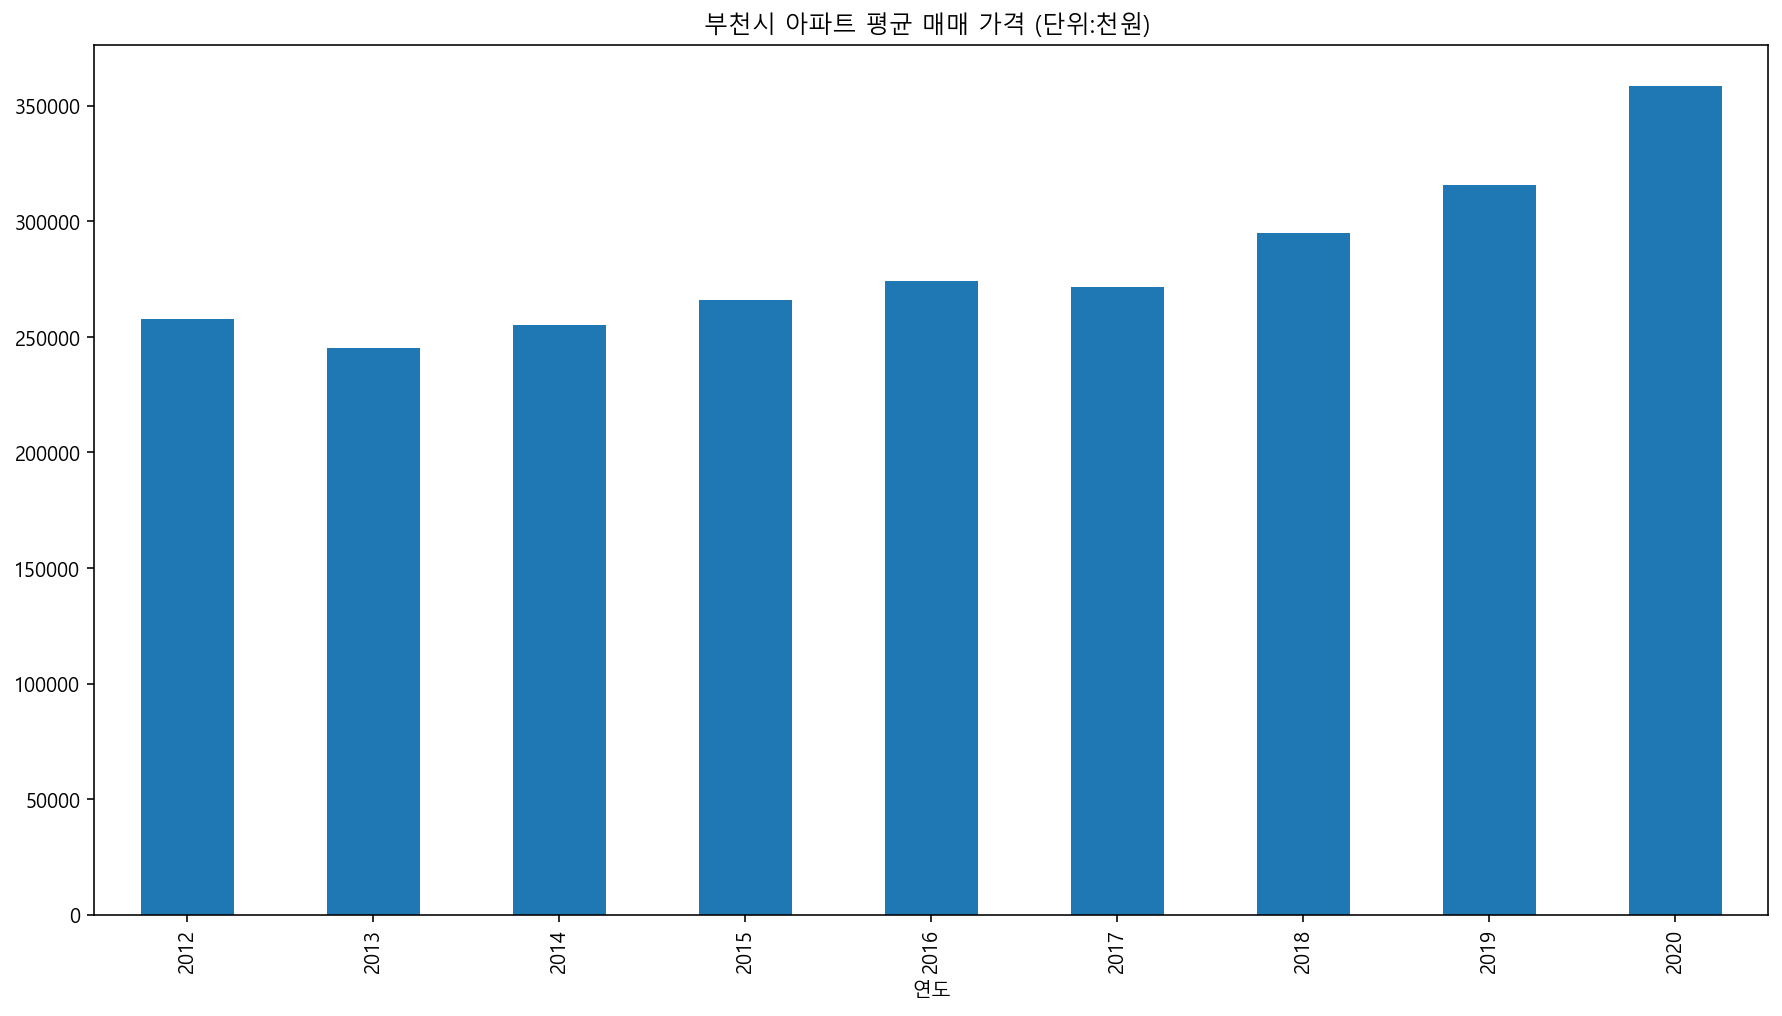

In [48]:
g_b = df_b.groupby(['연도'])['평균매매가격'].mean()
g_b.plot.bar(figsize=(15,8)).set_title('부천시 아파트 평균 매매 가격 (단위:천원) ')

<AxesSubplot:xlabel='연도', ylabel='평균매매가격'>

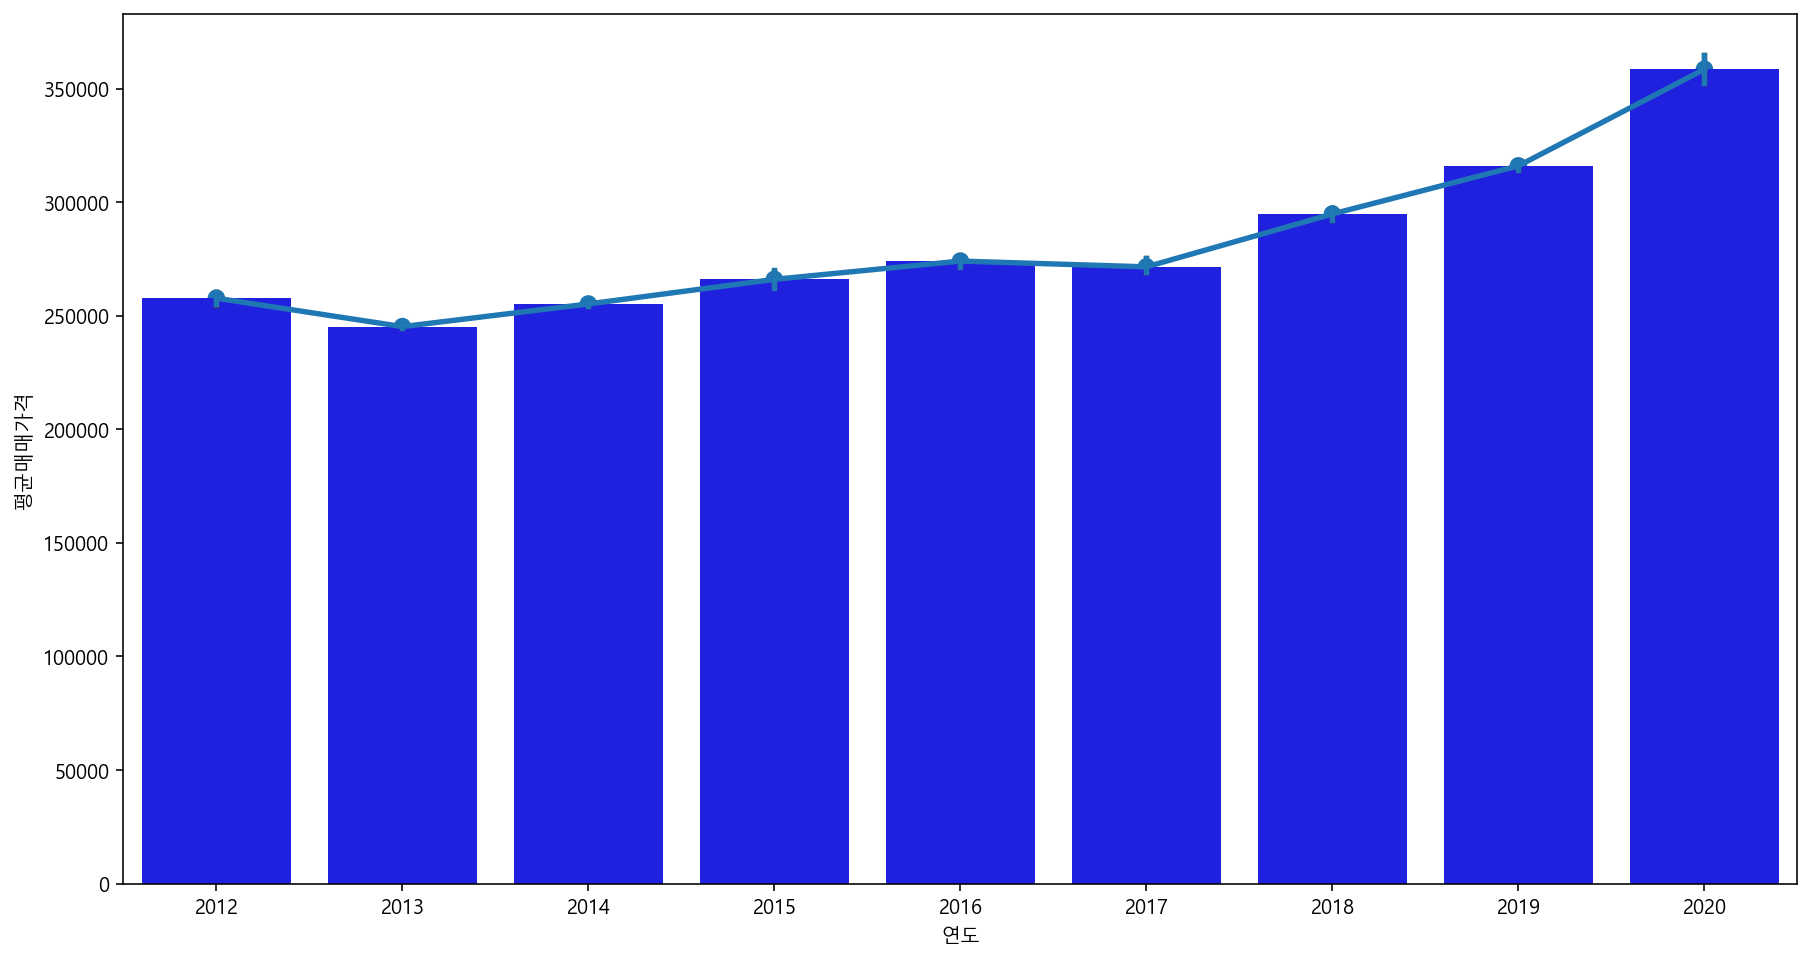

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_b, x="연도", y="평균매매가격", color='b')
sns.pointplot(data=df_b, x="연도", y="평균매매가격")

Text(0.5, 1.0, '부천시 평균 아파트 매매 가격 (단위:천원)')

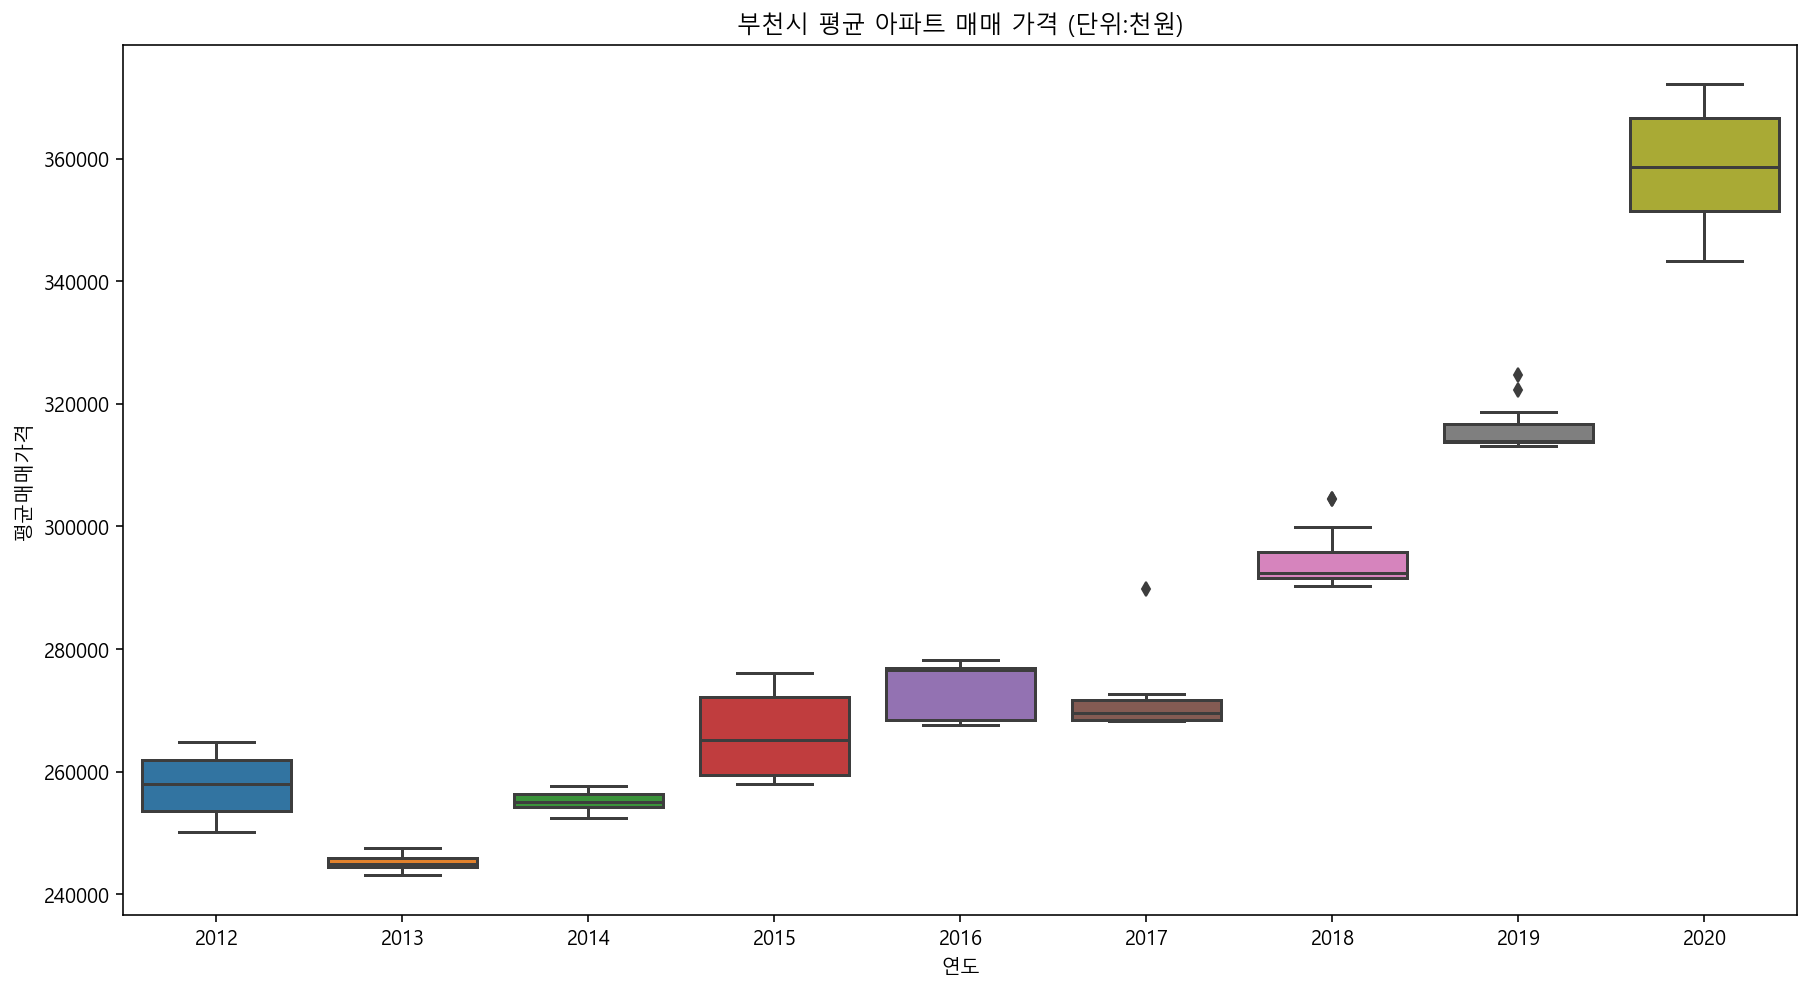

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_b, x="연도", y="평균매매가격").set_title('부천시 평균 아파트 매매 가격 (단위:천원)')

In [51]:
df_price.head()

,평균매매가격,지역,연도,월
0,264474.0,전국,2012,1
1,365249.0,수도권,2012,1
2,163394.0,지방권,2012,1
3,195186.0,6대광역시,2012,1
4,190421.0,5대광역시,2012,1


In [52]:
df_center = df_price[df_price['지역'].str.contains('경기')].copy()

In [53]:
df_center = df_center[2:]

In [54]:
df_center['시군'] =  df_center.loc[df_center['지역'].str.contains('시'), '지역']

In [55]:
df_center = df_center[df_center['시군'].notnull()]

In [56]:
df_center = df_center[['평균매매가격','연도', '월', '시군']].copy()

In [57]:
df_center['시군'] = df_center['시군'].apply(city_lower)

## 경기도 전처리 완료

In [58]:
df_center

,평균매매가격,연도,월,시군
42,652174.0,2012,1,과천시
43,319433.0,2012,1,안양시
46,506489.0,2012,1,성남시
50,290792.0,2012,1,군포시
51,320598.0,2012,1,의왕시
...,...,...,...,...
24634,274254.0,2020,9,파주시
24636,137188.0,2020,9,포천시
24637,141532.0,2020,9,동두천시
24638,201096.0,2020,9,양주시


In [59]:
g_c = df_center.groupby(['시군','연도'])['평균매매가격'].mean().unstack().round()

Text(0.5, 1.0, '경기도 시군 아파트 평균 매매가 동향 (단위:천원)')

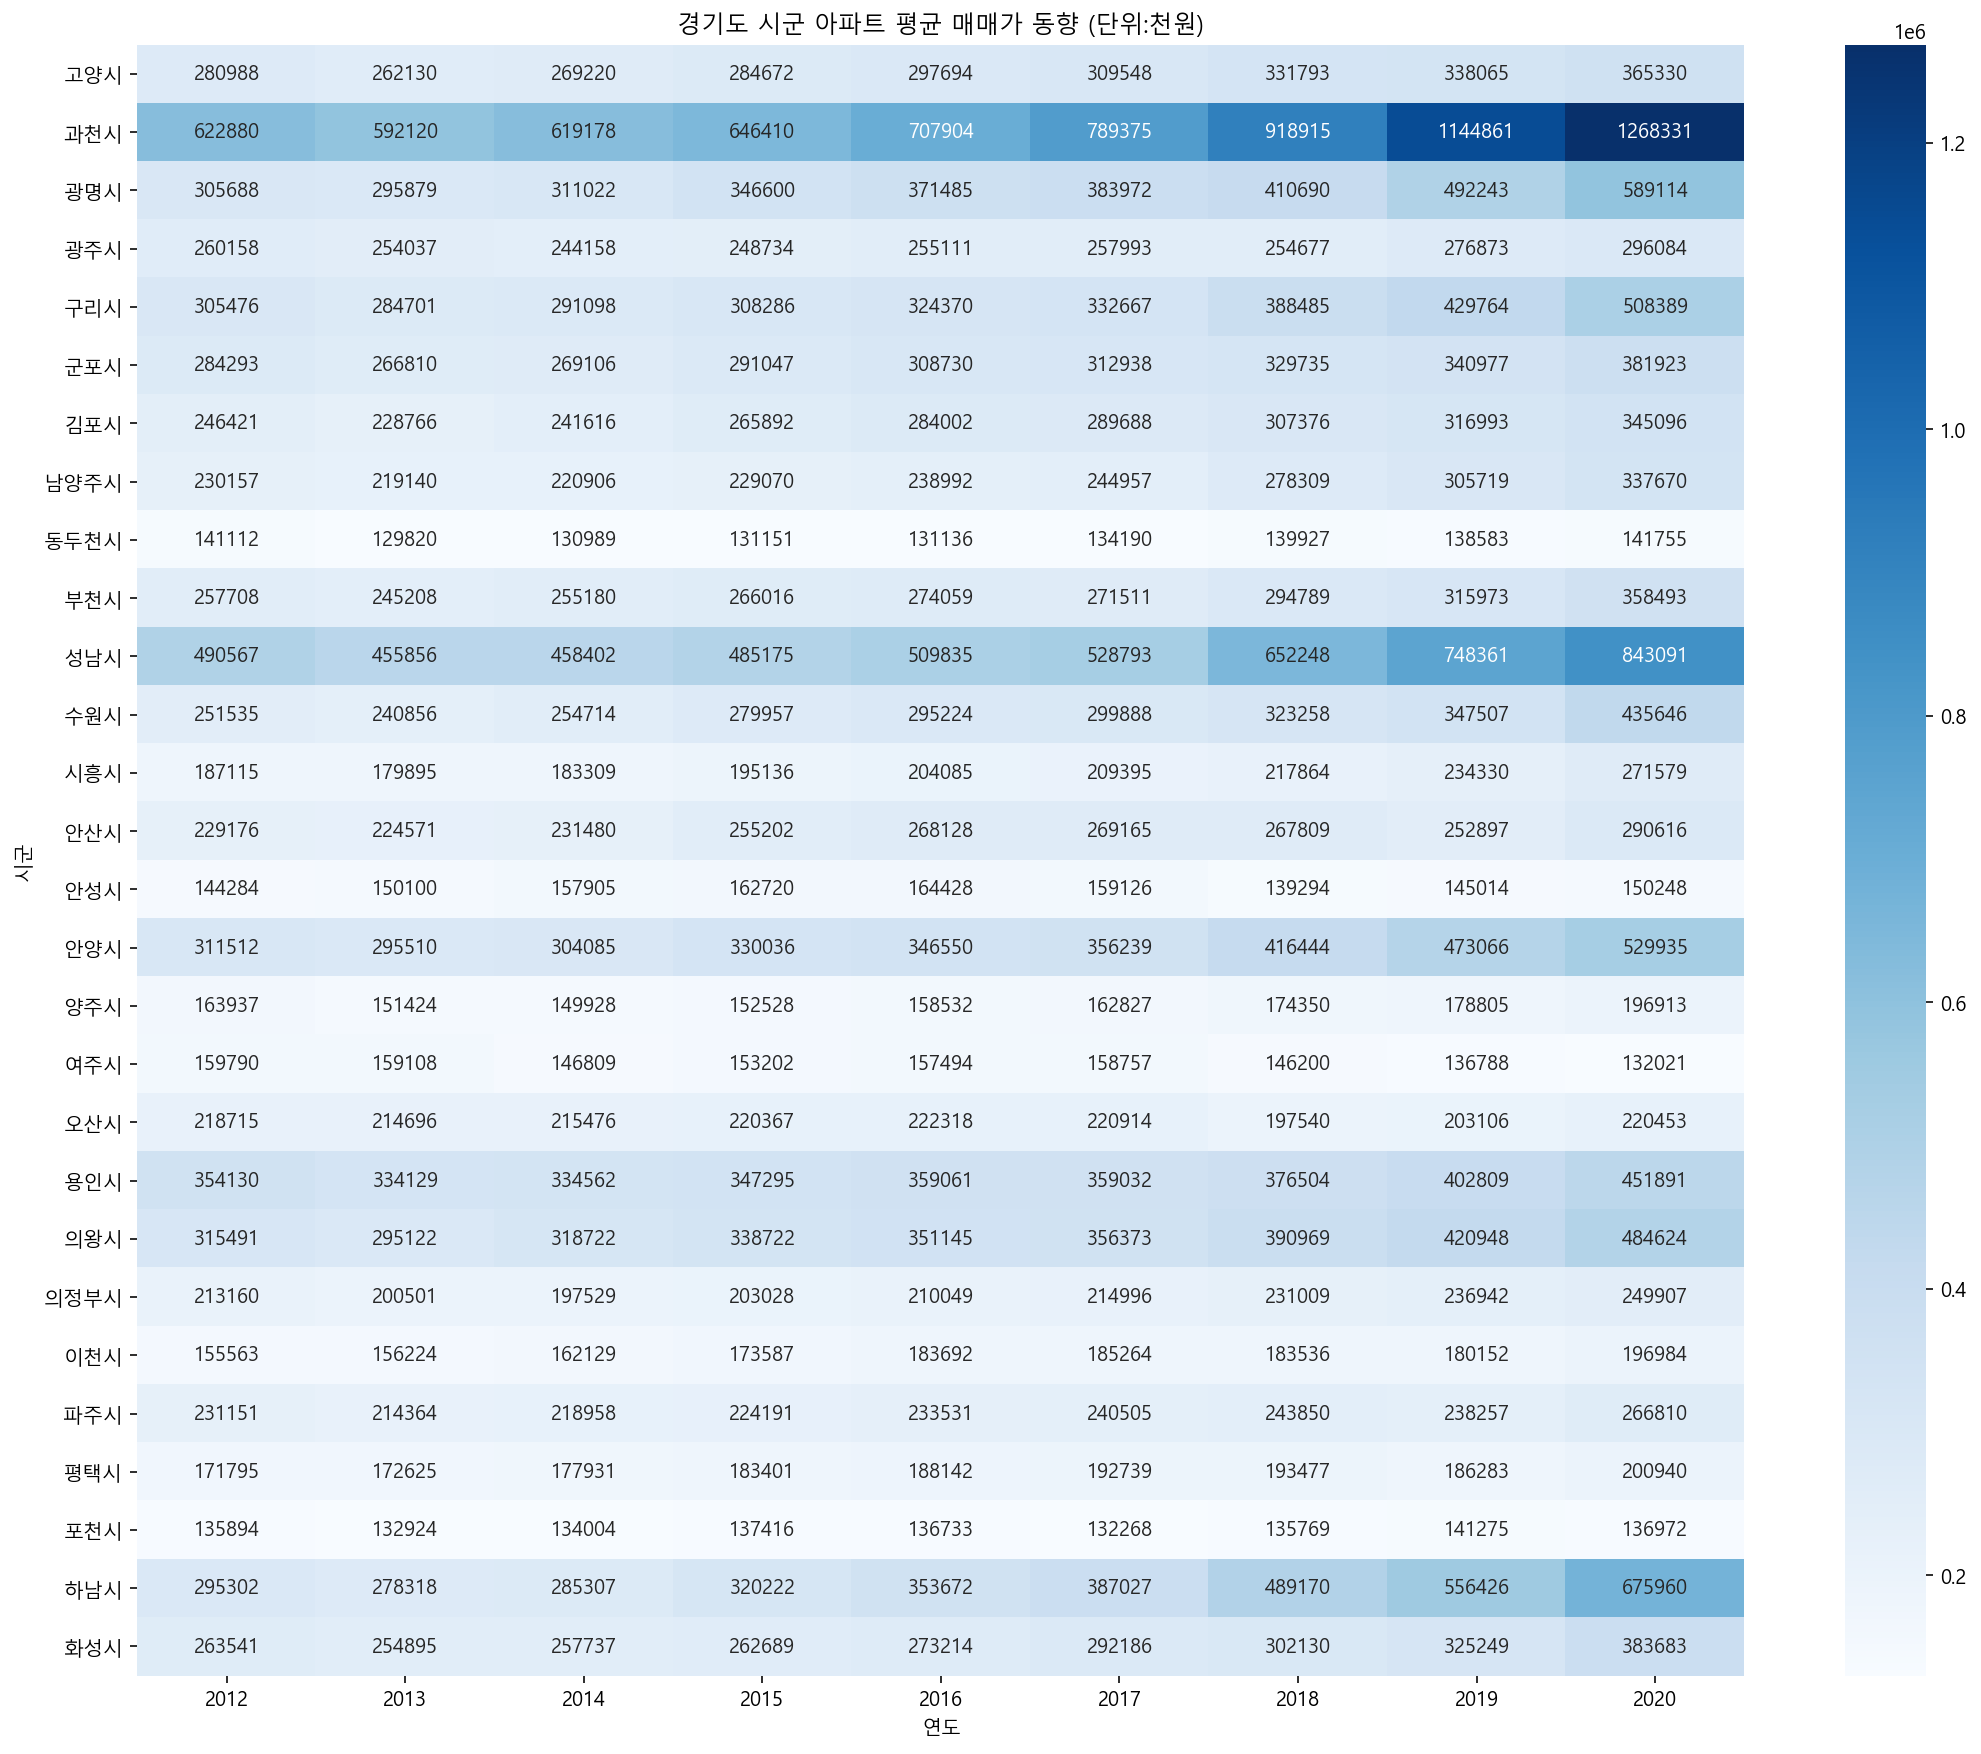

In [68]:
plt.figure(figsize=(18,15))
sns.heatmap(g_c, annot = True, fmt = '.0f', cmap='Blues').set_title('경기도 시군 아파트 평균 매매가 동향 (단위:천원)')

Text(0.5, 1.0, '경기도 시군 아파트 평균 매매가 동향')

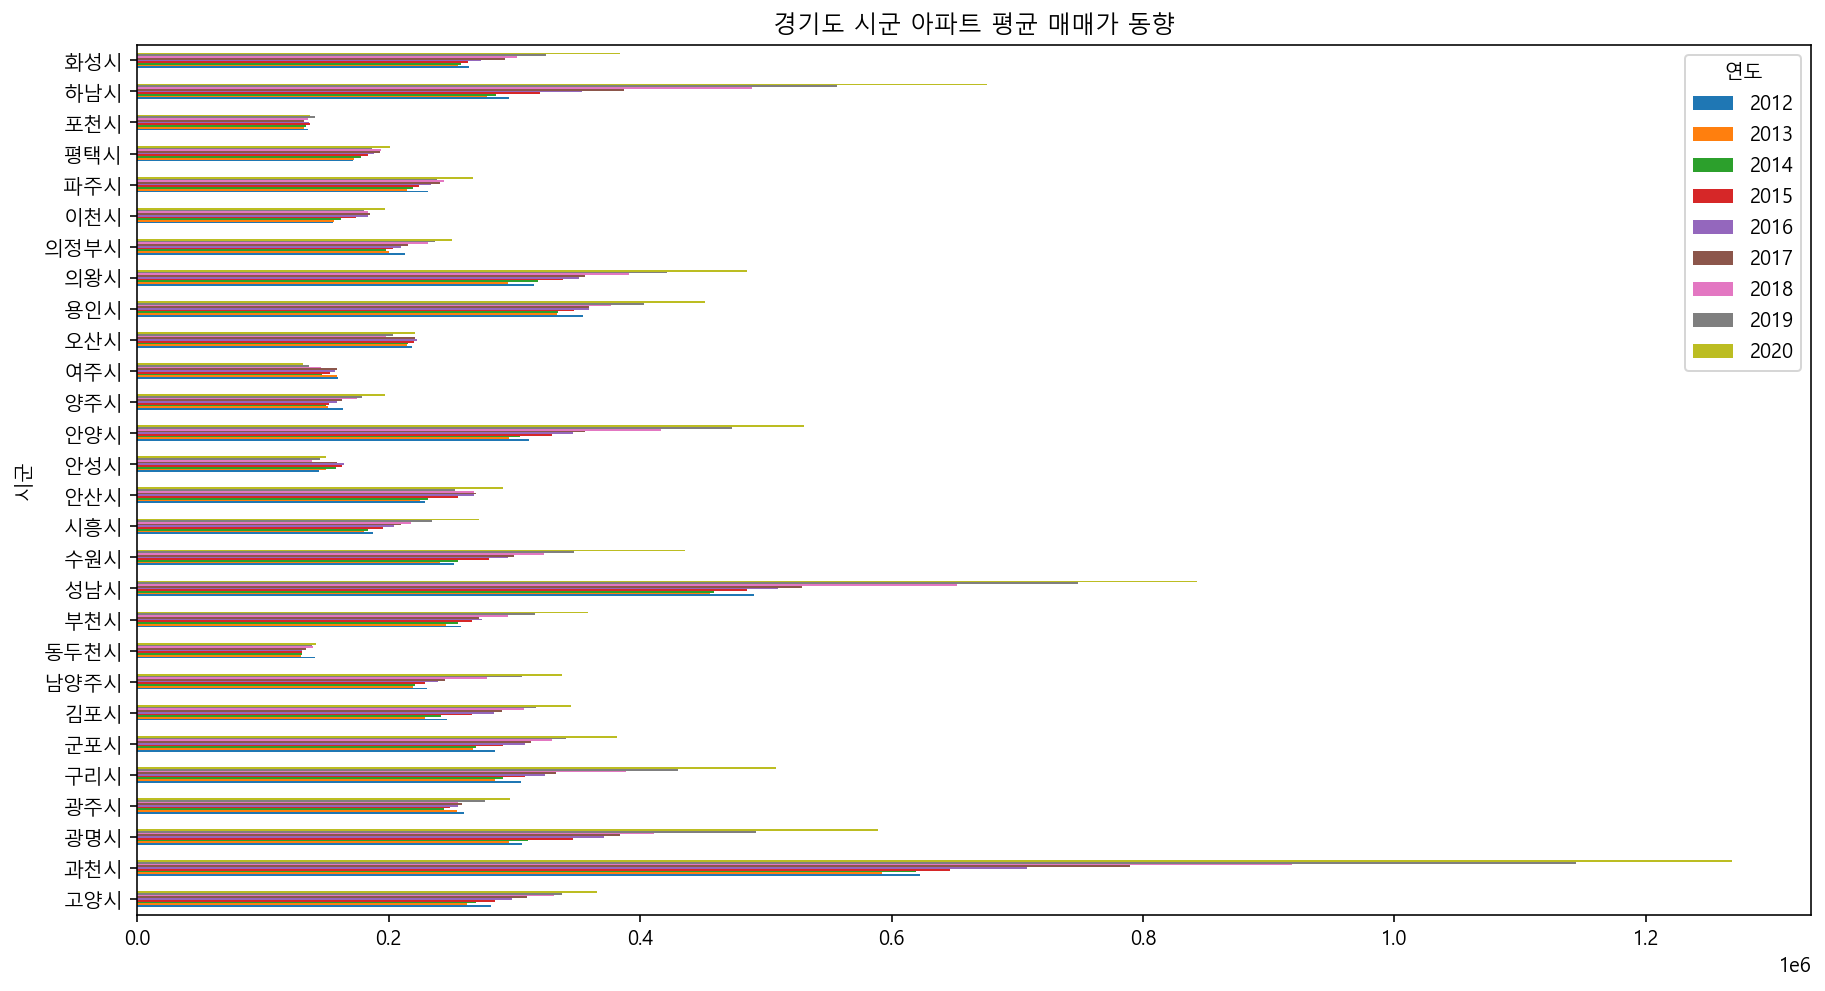

In [64]:
g_c.plot.barh(figsize=(15,8)).set_title('경기도 시군 아파트 평균 매매가 동향')

C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.8% of the points cannot be

<AxesSubplot:xlabel='시군', ylabel='평균매매가격'>

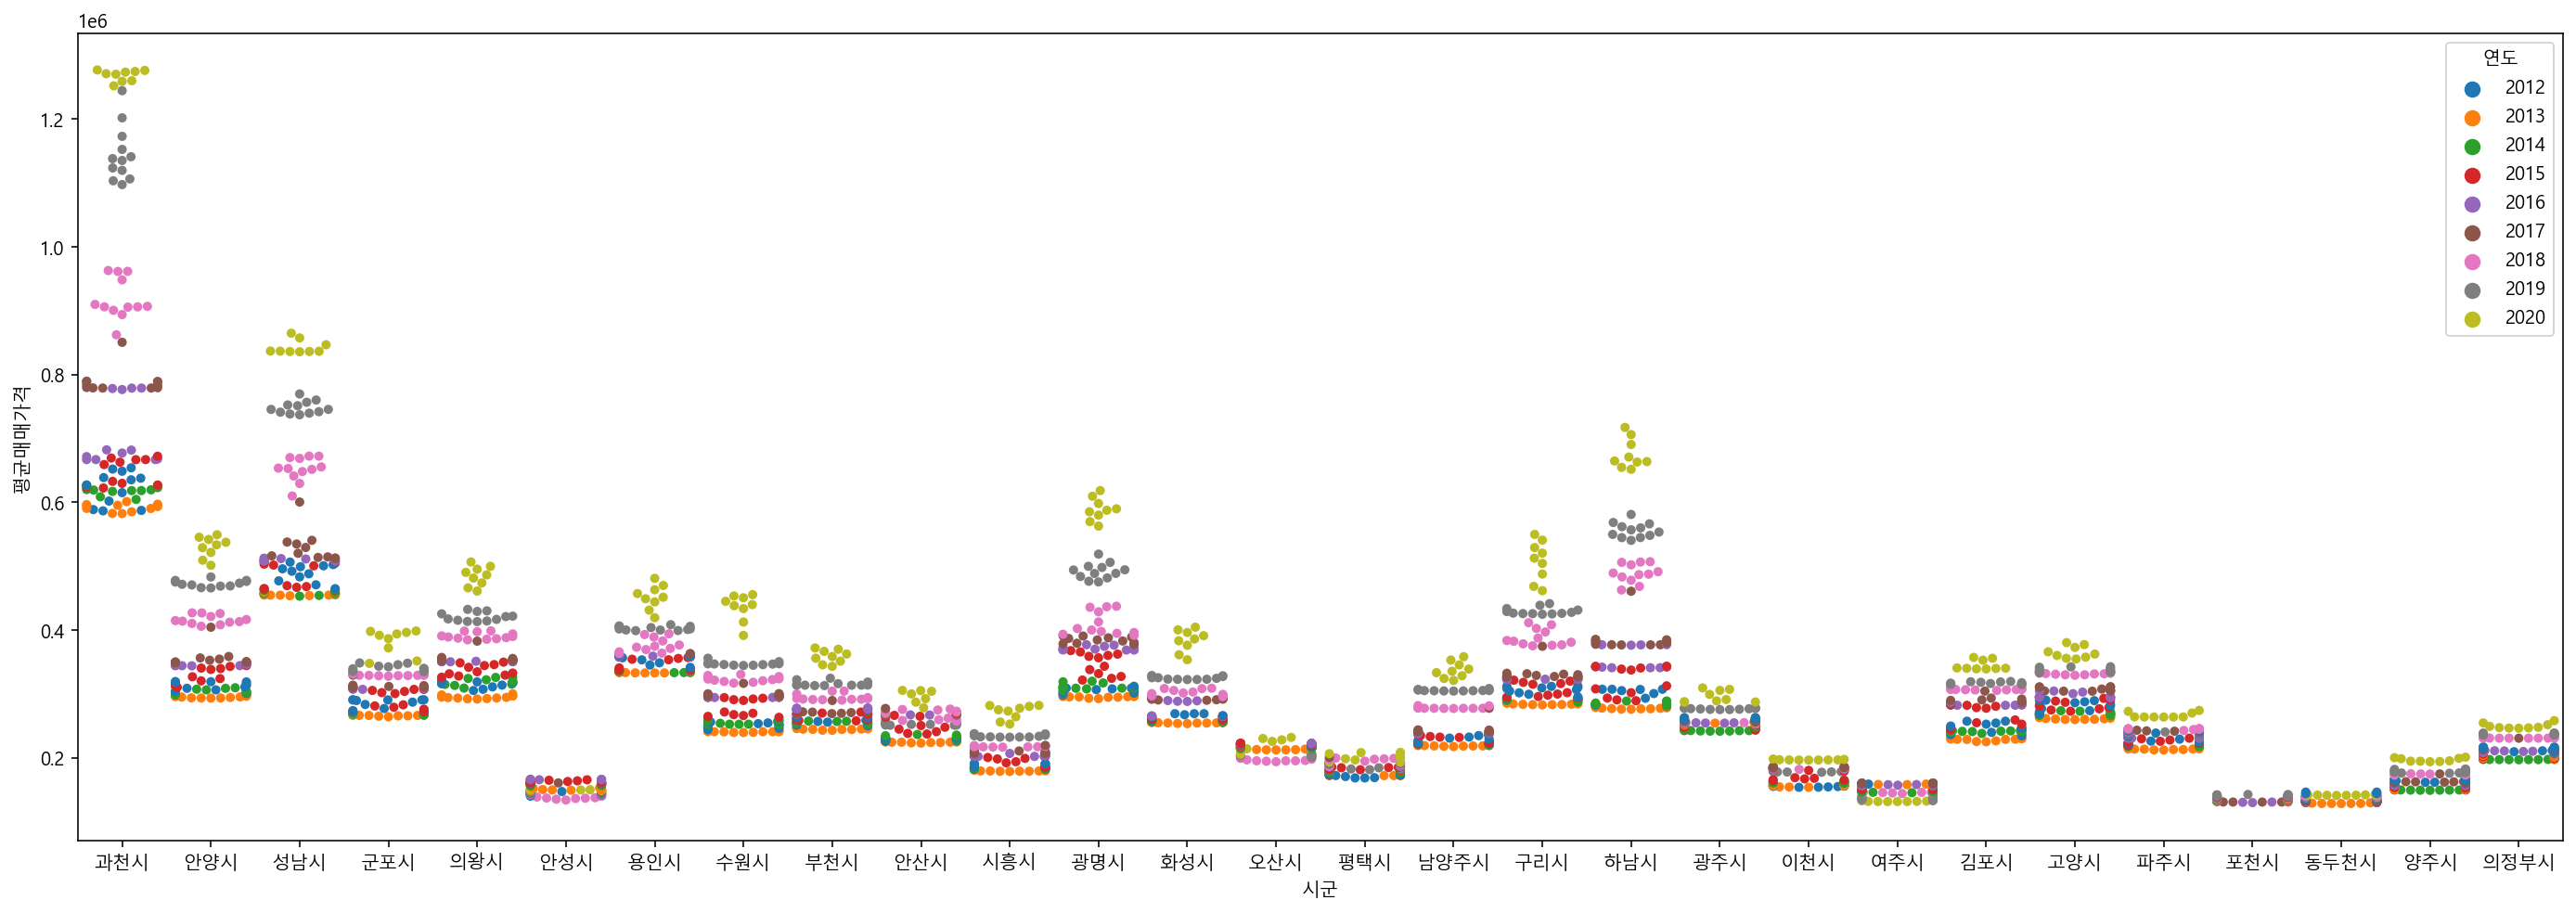

In [62]:
plt.figure(figsize=(24, 8))
sns.swarmplot(data=df_center, x="시군", y="평균매매가격", hue="연도")